# INN Hotels Project

##**Context**

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

##**Objective**

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

##**Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary**

- **Booking_ID**: Unique identifier of each booking  
- **no_of_adults**: Number of adults  
- **no_of_children**: Number of children  
- **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel  
- **no_of_week_nights**: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel  
- **type_of_meal_plan**: Type of meal plan booked by the customer:  
  - Not Selected – No meal plan selected  
  - Meal Plan 1 – Breakfast  
  - Meal Plan 2 – Half board (breakfast and one other meal)  
  - Meal Plan 3 – Full board (breakfast, lunch, and dinner)  
- **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1 - Yes)  
- **room_type_reserved**: Type of room reserved by the customer (encoded by INN Hotels)  
- **lead_time**: Number of days between the date of booking and the arrival date  
- **arrival_year**: Year of arrival date  
- **arrival_month**: Month of arrival date  
- **arrival_date**: Date of the month  
- **market_segment_type**: Market segment designation  
- **repeated_guest**: Is the customer a repeated guest? (0 - No, 1 - Yes)  
- **no_of_previous_cancellations**: Number of previous bookings canceled by the customer prior to the current booking  
- **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking  
- **avg_price_per_room**: Average price per day of the reservation (in euros); prices of the rooms are dynamic  
- **no_of_special_requests**: Total number of special requests made by the customer (e.g., high floor, view from the room, etc.)  
- **booking_status**: Flag indicating if the booking was canceled or not  

##**Importing necessary libraries and data**

In [ ]:
#manipulating/analyzing data
import numpy as np
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#statistics
import scipy.stats as stats

#splitting data into train and test
from sklearn.model_selection import train_test_split

#making logistic regression model
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

#making decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#tuning hyperparameters
from sklearn.model_selection import GridSearchCV

#deriving metrics to assess model performance
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score,
                             ConfusionMatrixDisplay, roc_auc_score, confusion_matrix,
                             precision_recall_curve, roc_curve, make_scorer)

#manipulating the number of rows and columns displayed
pd.set_option('display.max_columns', None) #no limit for rows displayed
pd.set_option('display.max_rows', 200) #maximum 200 limit for rows displayed

#preventing warnings from being displayed
import warnings
warnings.filterwarnings('ignore')

##Loading the dataset

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/My Drive/python intro/Hotelnn-project/INNHotelsGroup.csv")


Mounted at /content/drive


##Understanding the structure of the data

In [ ]:
df.head() # Loading first 5 rows of the data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.tail() # Loading last 5 rows of the data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


**Observations:**

* The dataset contains information about hotel bookings, including details like the number of adults, children, nights stayed, meal plans, and booking outcomes (canceled or not).

In [ ]:
df.shape  # Inspecting the Dataset Dimensions

(36275, 19)

**Observations:**

* There are 36,275 rows and 19 colums in the dataframe.

In [ ]:
df.info()  #Examining Data Types of Columns in the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Observations:**

* The dataset contains 36,275 entries and 19 columns, with no missing values. It includes both numerical and categorical data, such as booking details, customer preferences, and booking status, with most columns being numerical (int64 or float64).
* All columns have 36275 non-null entries, meaning there are no missing values in the dataset.

In [ ]:
#viewing the statistical summary for all columns in hotels
df.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


**Observations:**

- **Booking Distribution**: The dataset includes 36,275 unique bookings, primarily made for 2 adults, with very few involving children.  
- **Room and Meal Preferences**: "Room_Type 1" and "Meal Plan 1" (breakfast) are the most popular choices. About 23% of bookings did not opt for a meal plan.  
- **Lead Time and Stays**: Average lead time is 85 days, with most bookings involving 0–2 weekend nights and 1–3 weekday nights.  
- **Market Segment**: The majority of bookings (64%) come from the "Online" market segment.  
- **Cancellations**: Around 32.73% of bookings are canceled, while 67.27% are completed. Only 2.56% of bookings are by repeated guests.  
- **Special Requests and Parking**: Most bookings have 0–1 special requests, and only 3% of bookings require parking space.

##Univariate Analysis

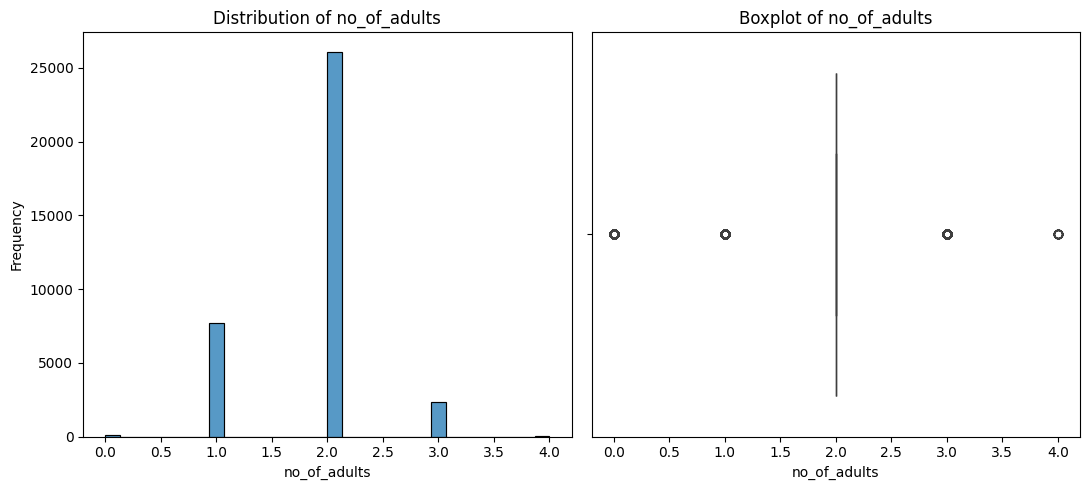

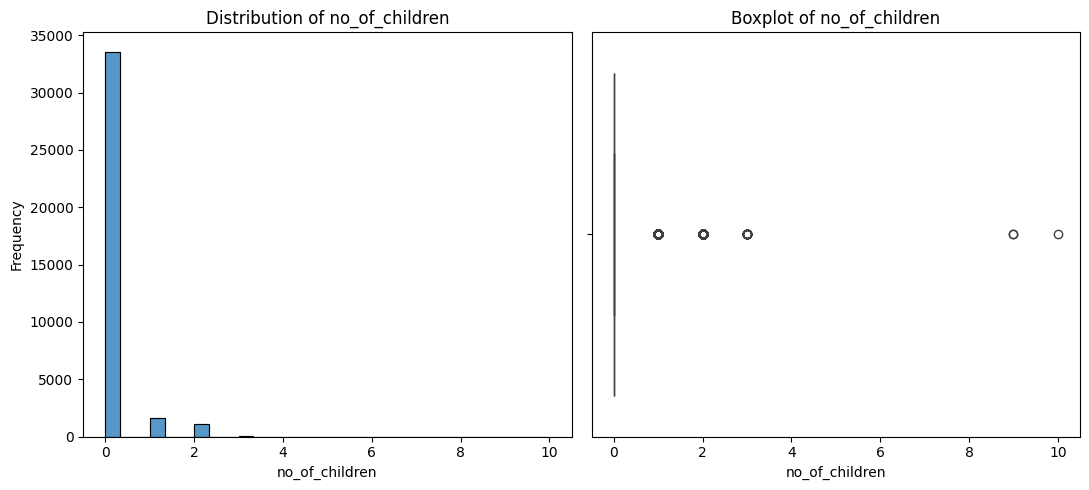

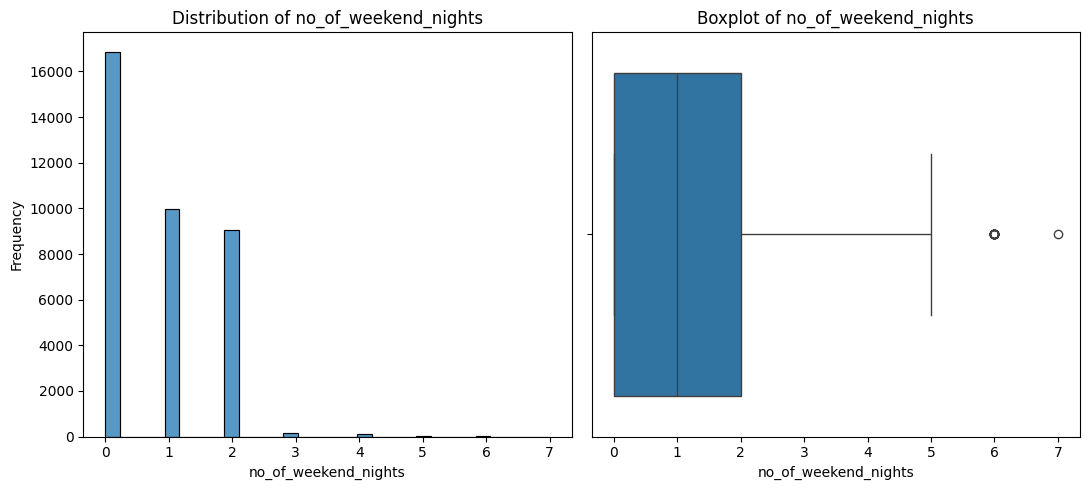

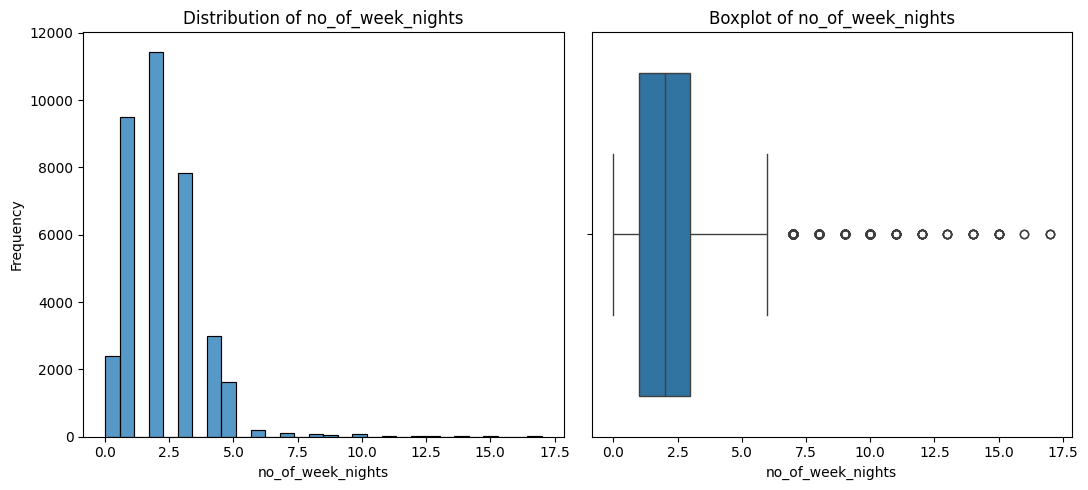

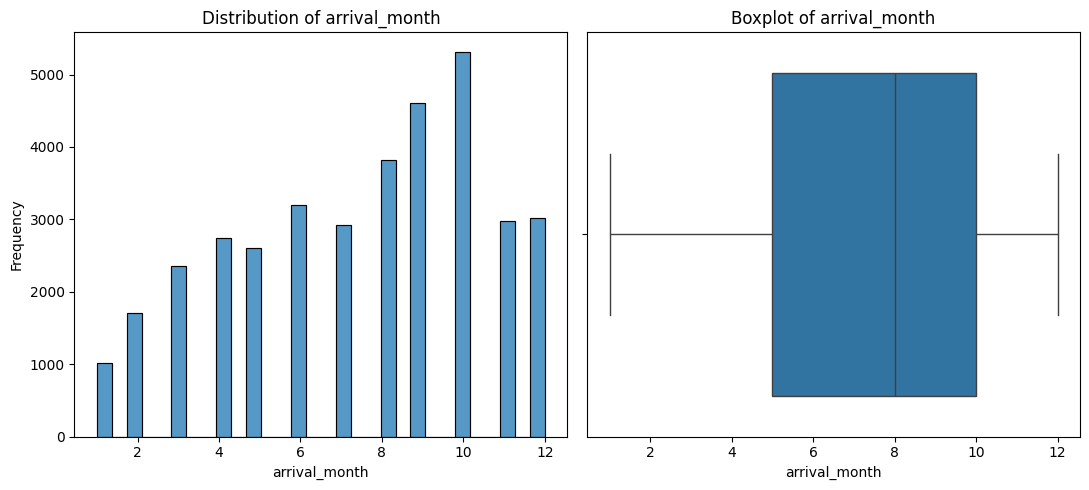

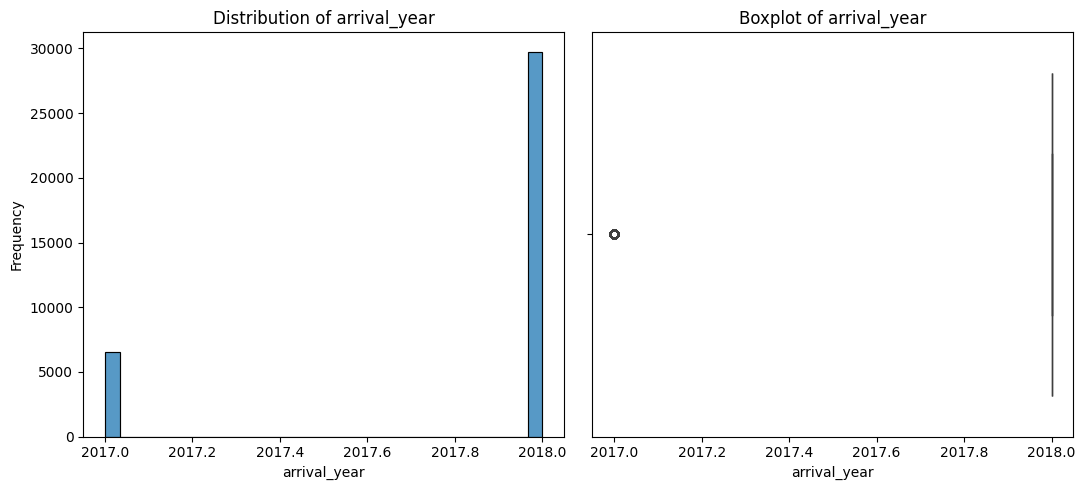

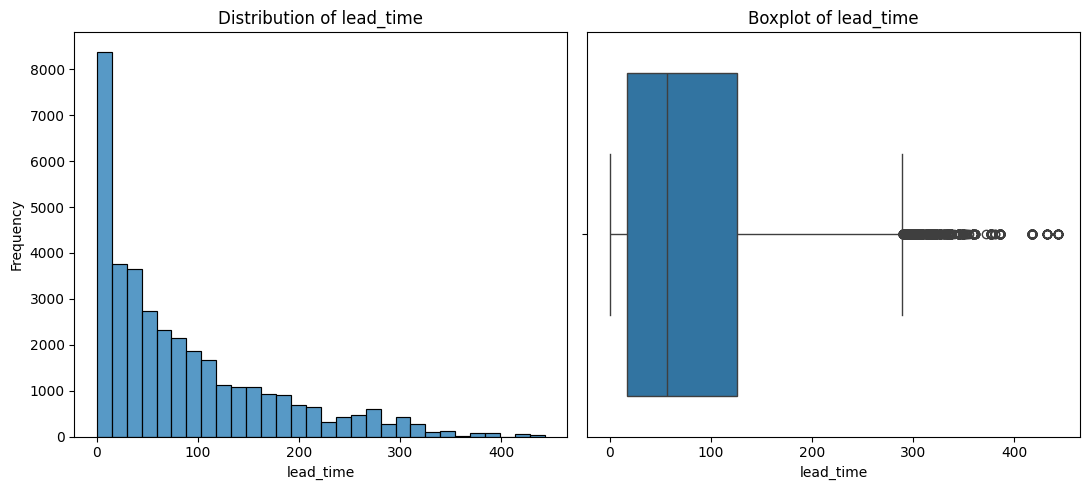

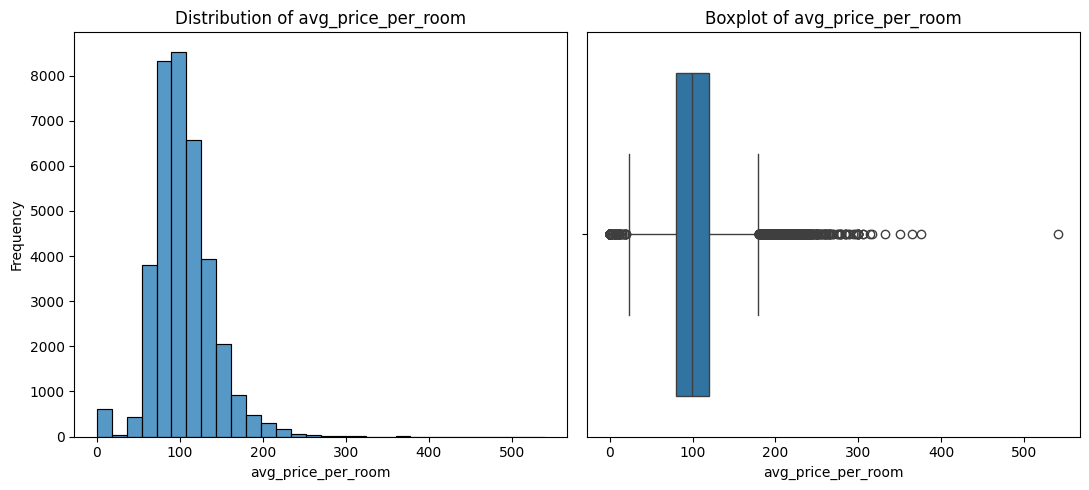

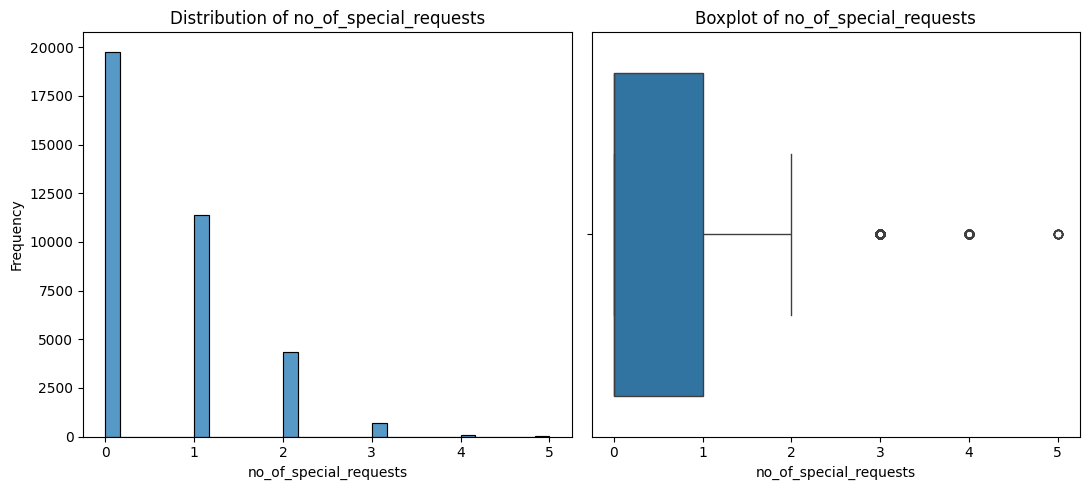

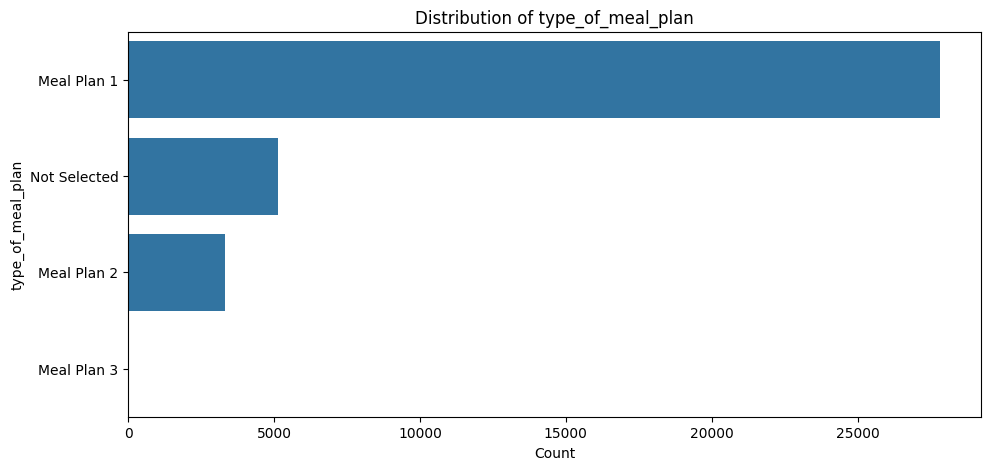

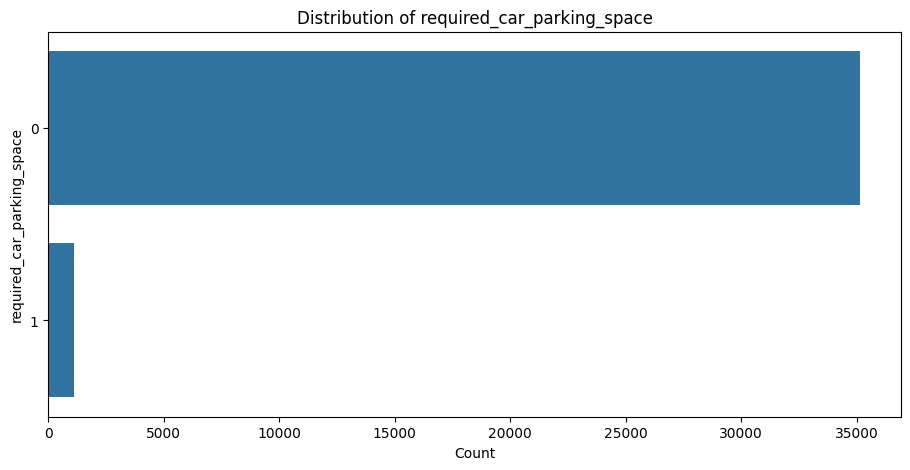

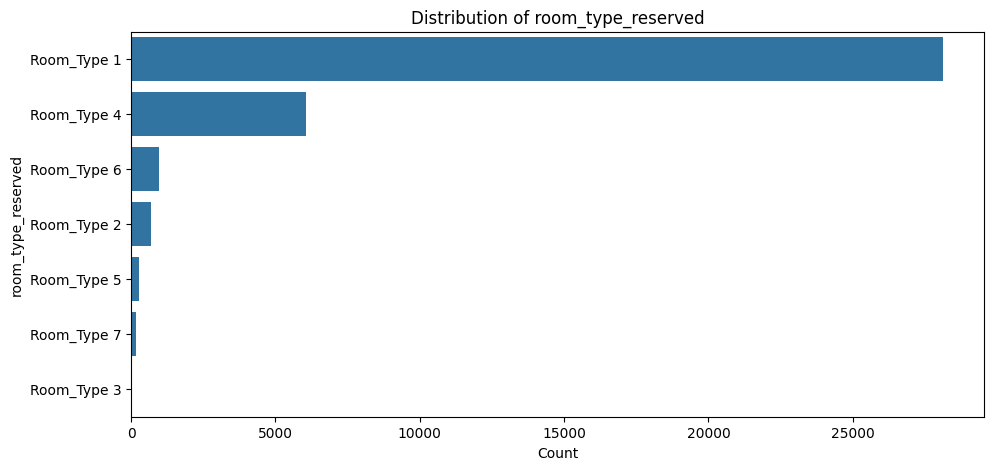

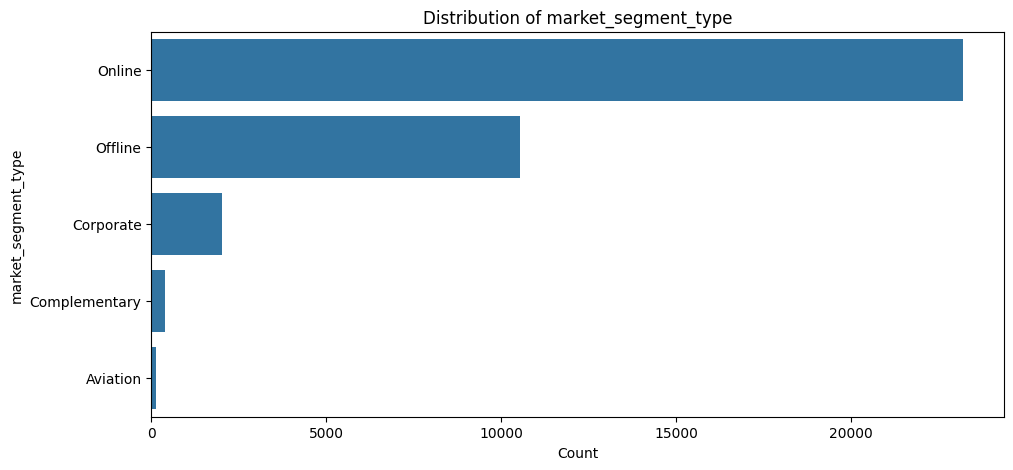

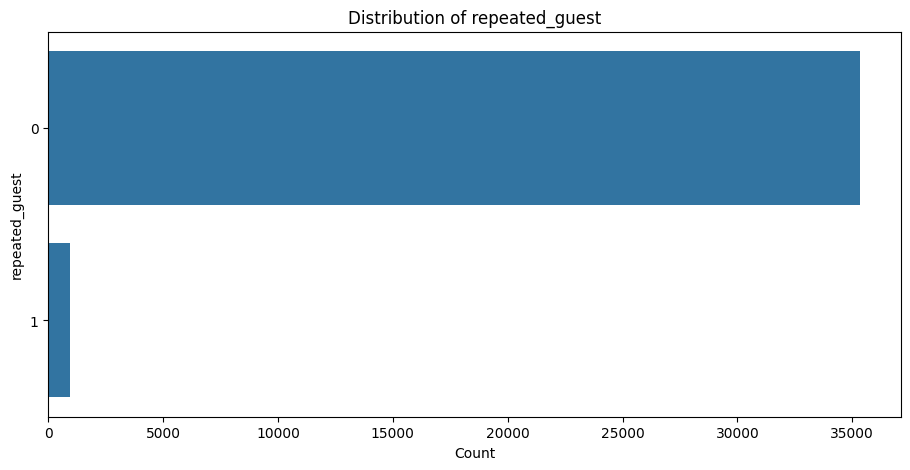

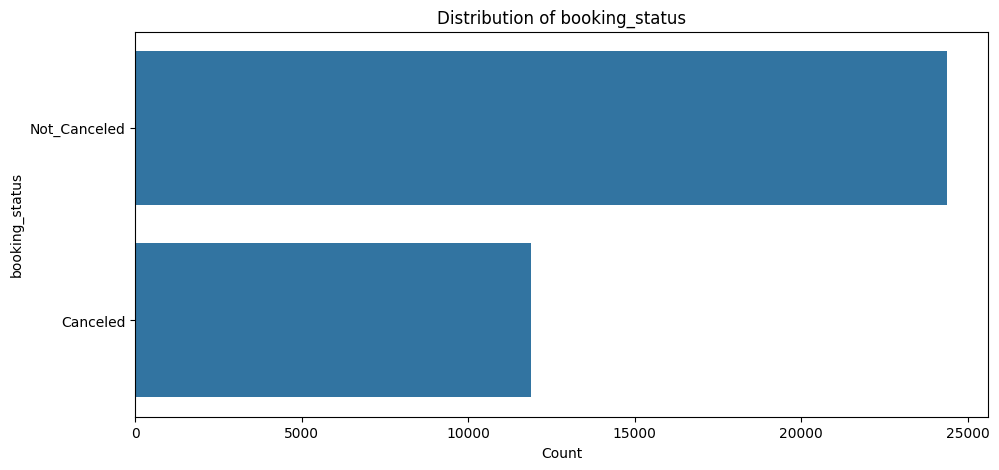

In [ ]:
numerical_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights','arrival_month','arrival_year', 'lead_time', 'avg_price_per_room', 'no_of_special_requests']
categorical_columns = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

# Univariate analysis for numerical columns
def univariate_analysis_numerical(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(11, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)

        plt.tight_layout()
        plt.show()

# Univariate analysis for categorical columns
def univariate_analysis_categorical(df, categorical_columns):
    for column in categorical_columns:
        plt.figure(figsize=(11, 5))
        sns.countplot(y=df[column], order=df[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.show()


# Perform univariate analysis
univariate_analysis_numerical(df, numerical_columns)
univariate_analysis_categorical(df, categorical_columns)

**Observations:**

- Most bookings are for two adults, with no children included.  
- The majority of bookings are for zero weekend nights, and most involve two or fewer weekday nights.  
- Meal Plan 1 is the most commonly chosen option, and most bookings do not require a car parking space.  
- Room Type 1 is the most frequently reserved, and many bookings were made on the day of arrival. The lead time distribution is heavily skewed to the right, indicating that most bookings are made close to the arrival date.  
- Most bookings were made in 2018, with October having the highest number of arrivals and January the lowest.  
- The "online" market segment dominates the bookings.  
- Bookings typically have fewer than two previous cancellations.  
- The average room price distribution is slightly skewed to the right, with most bookings priced at 200 euros or less.  
- The number of special requests is also skewed to the right, with most bookings having no special requests.  
- A significant majority of bookings have not been canceled.  

##Bivariate Analysis

**Lead Time vs Booking Status**

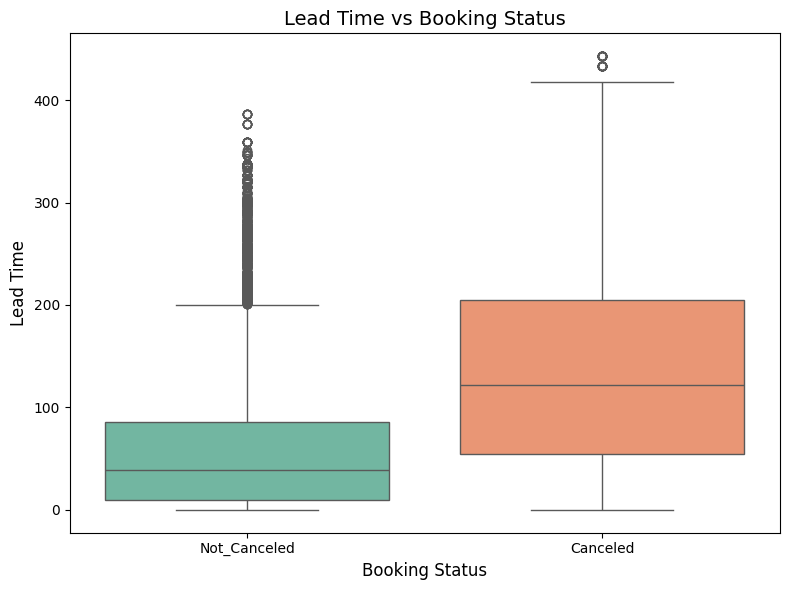

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='booking_status', y='lead_time', palette="Set2")
plt.title('Lead Time vs Booking Status', fontsize=14)
plt.xlabel('Booking Status', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)
plt.tight_layout()
plt.show()

**Observations:**

* The median lead time for canceled bookings is significantly higher compared to non-canceled bookings. This indicates that customers who book further in advance are more likely to cancel their reservations.
* The lead time distribution for canceled bookings shows a wider range, with several outliers extending to high values, whereas non-canceled bookings exhibit a more concentrated distribution with fewer outliers.

**Avg Price Per Room vs Booking Status**

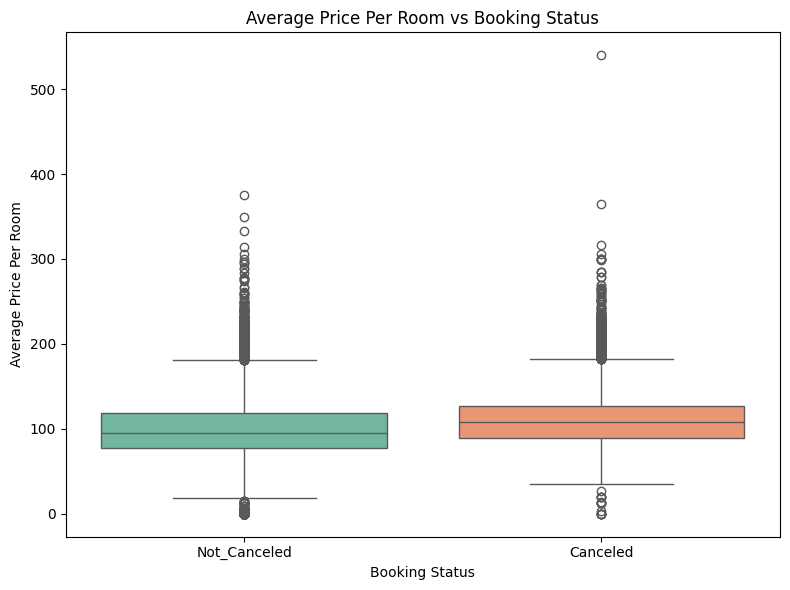

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='booking_status', y='avg_price_per_room', palette="Set2")
plt.title('Average Price Per Room vs Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price Per Room')
plt.tight_layout()
plt.show()


**Observations:**

* Bookings with higher average room prices might have a greater tendency to be canceled.
* Canceled bookings exhibit a wider range of average room prices compared to non-canceled bookings.


**Market Segment vs Booking Status**

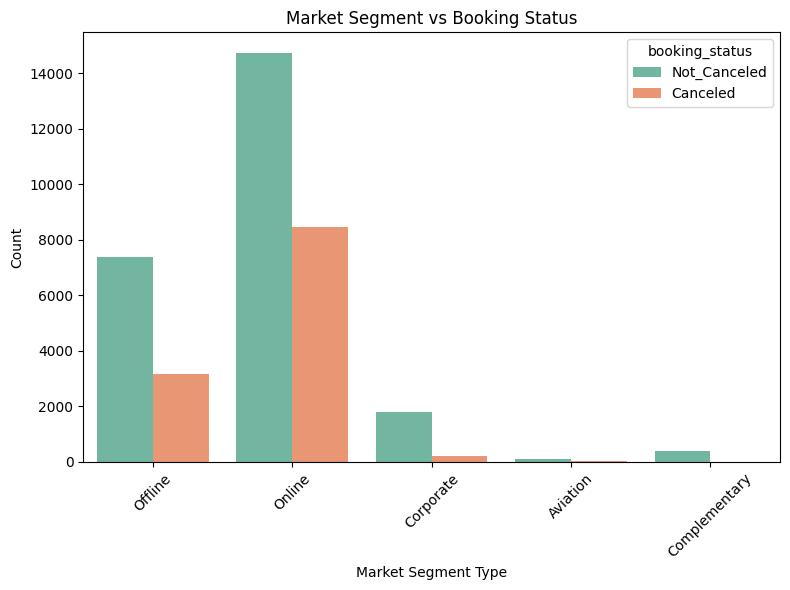

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='market_segment_type', hue='booking_status', palette="Set2")
plt.title('Market Segment vs Booking Status')
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observations

* Online bookings exhibit the highest cancellation rates across all market segments.
* Offline bookings demonstrate the lowest cancellation rates, suggesting a higher stability compared to online bookings.

**Market Segment vs Lead Time**

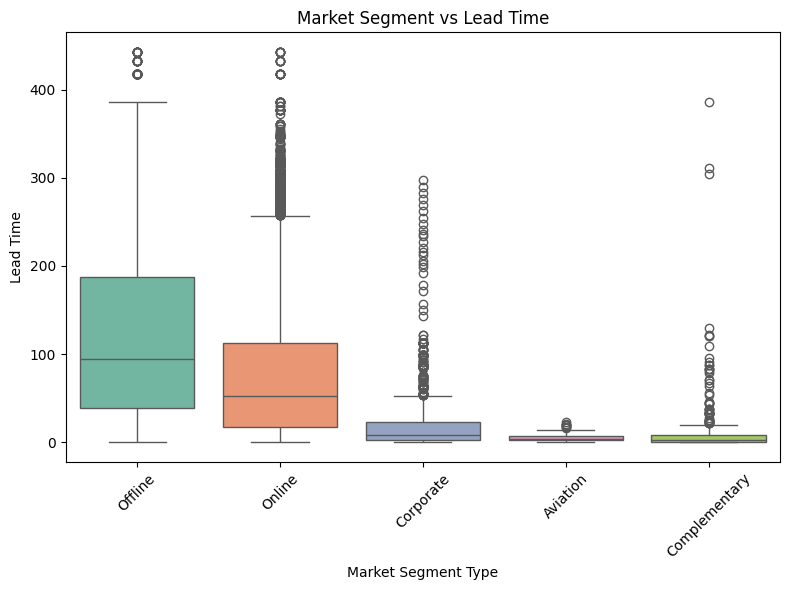

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='market_segment_type', y='lead_time', palette="Set2")
plt.title('Market Segment vs Lead Time')
plt.xlabel('Market Segment Type')
plt.ylabel('Lead Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations:**

* Online bookings exhibit the highest lead times compared to other market segments, suggesting a potential trend of advance bookings through online channels.

* Offline bookings demonstrate the shortest lead times among the segments, indicating a preference for shorter booking windows in this channel.

* Variability in Lead Times: While Online and Corporate segments show a wider range of lead times, Offline and Aviation segments exhibit more concentrated lead time distributions.

**No. of Week Nights and Weekend Nights vs Booking Status**

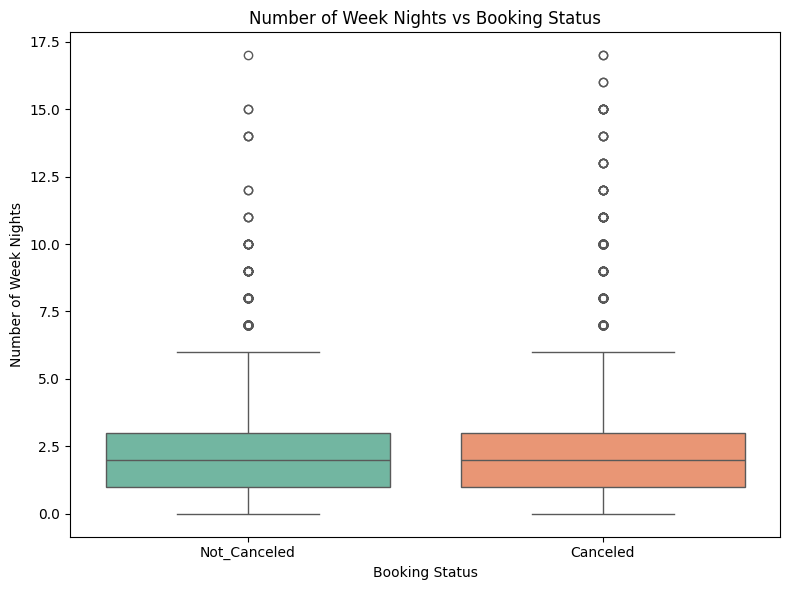

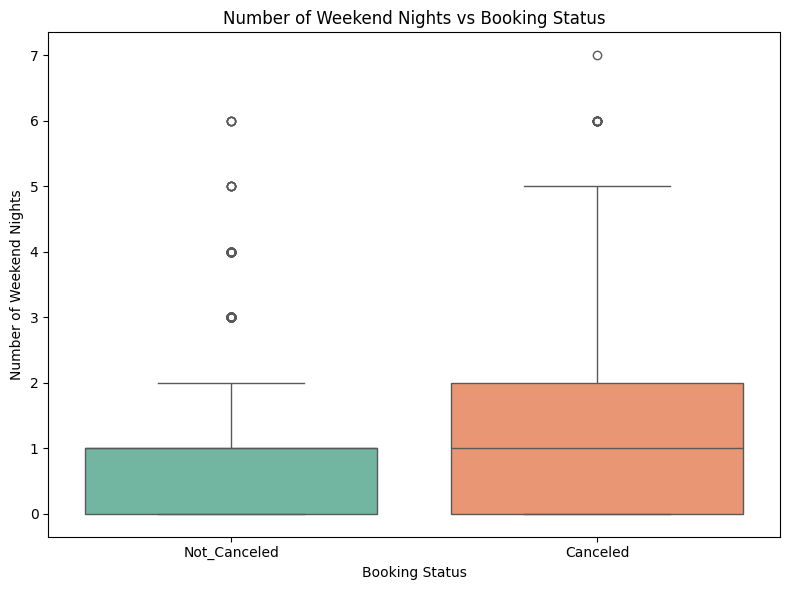

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='booking_status', y='no_of_week_nights', palette="Set2")
plt.title('Number of Week Nights vs Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Number of Week Nights')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='booking_status', y='no_of_weekend_nights', palette="Set2")
plt.title('Number of Weekend Nights vs Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Number of Weekend Nights')
plt.tight_layout()
plt.show()


**Repeated Guests vs Booking Status**

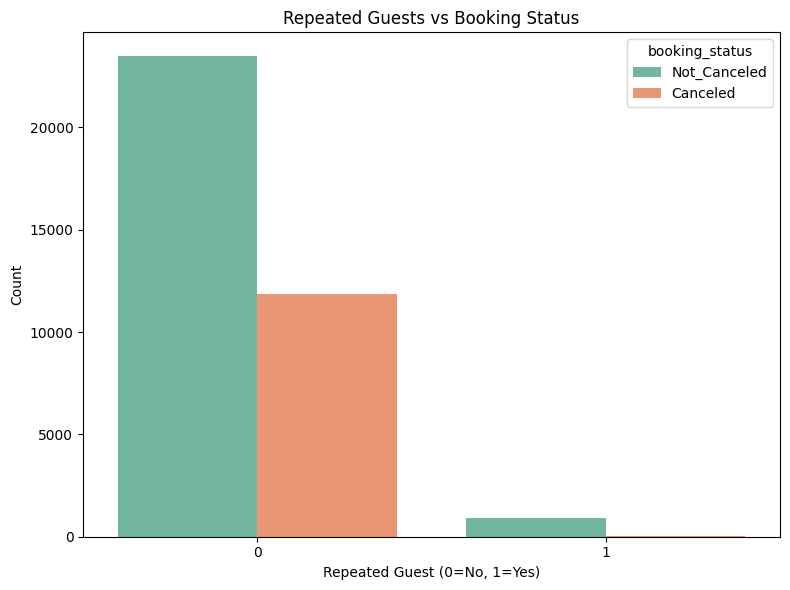

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='repeated_guest', hue='booking_status', palette="Set2")
plt.title('Repeated Guests vs Booking Status')
plt.xlabel('Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Observations:**

* Non-repeated guests have a higher cancellation rate compared to repeated guests.

**Special Requests vs Booking Status**

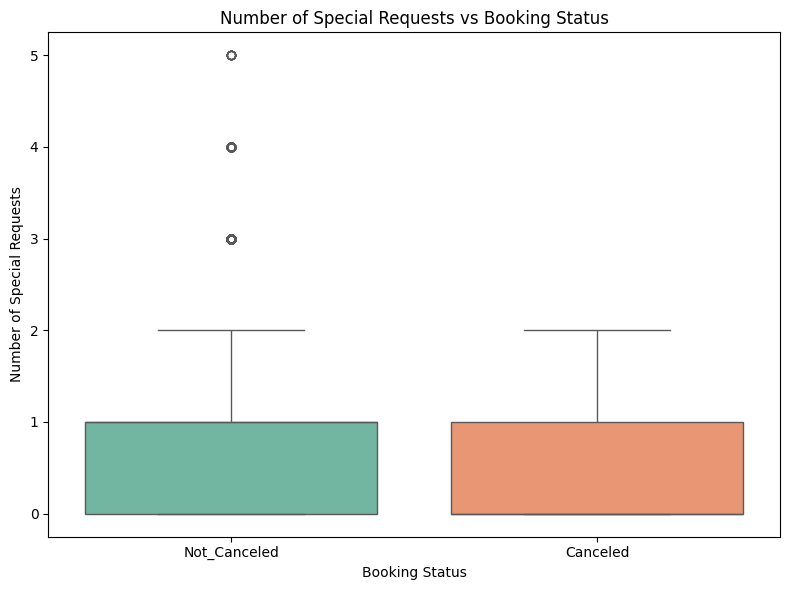

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='booking_status', y='no_of_special_requests', palette="Set2")
plt.title('Number of Special Requests vs Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Number of Special Requests')
plt.tight_layout()
plt.show()


**Observations:**

* Bookings with a higher number of special requests might have a slightly higher tendency to be canceled.

**Room Type vs Booking Status**

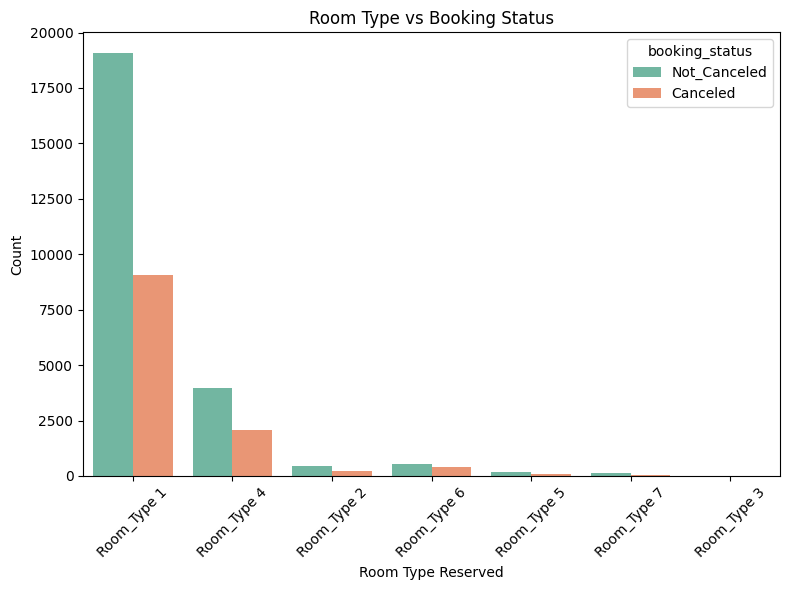

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='room_type_reserved', hue='booking_status', palette="Set2")
plt.title('Room Type vs Booking Status')
plt.xlabel('Room Type Reserved')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations:**

* Room Type 1 is the most popular but also has a relatively high cancellation rate. This suggests that while it's in high demand, factors like pricing or other characteristics might contribute to a higher likelihood of cancellations.

* Other room types have fewer bookings and cancellations. This might indicate lower demand, different pricing strategies, or distinct characteristics for these room types.

**No. of Adults vs Avg Price Per Room vs Booking Status**

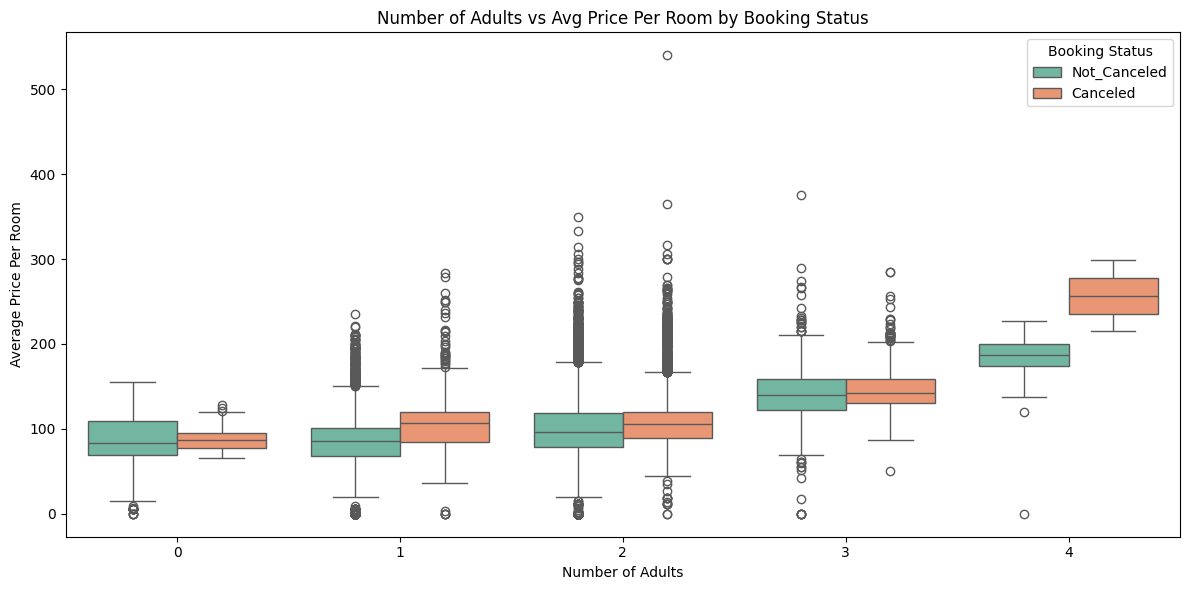

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='no_of_adults', y='avg_price_per_room', hue='booking_status', palette="Set2")
plt.title('Number of Adults vs Avg Price Per Room by Booking Status')
plt.xlabel('Number of Adults')
plt.ylabel('Average Price Per Room')
plt.legend(title='Booking Status')
plt.tight_layout()
plt.show()


**Observations:**

* Price generally increases with the number of adults.

* Canceled bookings tend to have higher average prices compared to non-canceled bookings for most adult counts.

* Price variability is observed across both canceled and non-canceled bookings, suggesting that factors beyond the number of adults influence pricing and cancellation risk.

### EDA Questions

**What are the busiest months in the hotel?**

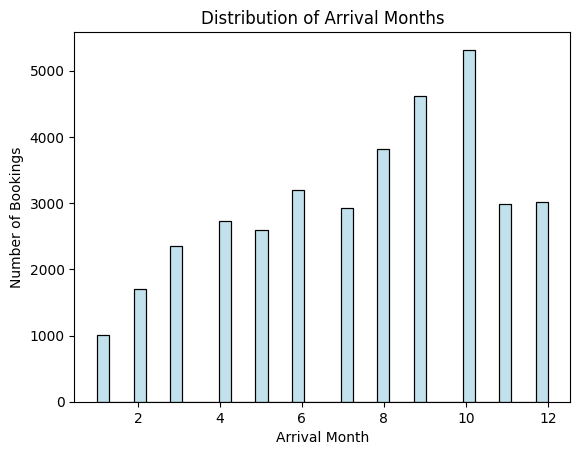

In [ ]:
#making histogram of arrival_month column in hotels
sns.histplot(data=df, x='arrival_month', color='lightblue') #plotting arrival_month on x-axis
plt.title('Distribution of Arrival Months') #setting title of histogram
plt.xlabel('Arrival Month') #setting title of x-axis
plt.ylabel('Number of Bookings') #setting title of y-axis
plt.show(); #displaying histogram

Observations:
**bold text**
* October is the busiest month for the hotel, followed closely by September, with the highest number of bookings compared to other months.
* The number of bookings gradually increases from January to October, indicating a seasonal trend, with January having the least number of bookings.

**Which market segment do most of the guests come from?**

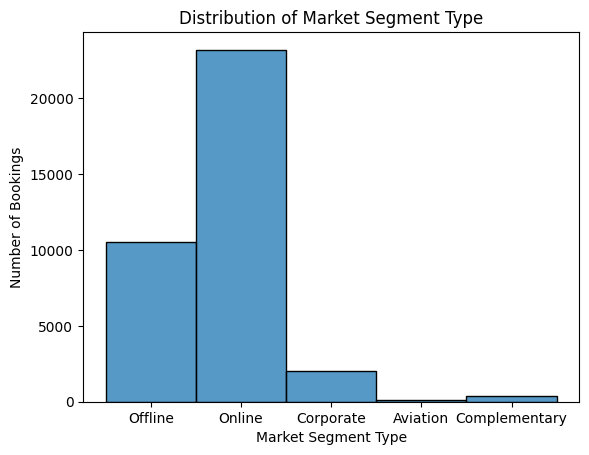

In [ ]:
sns.histplot(data=df,x='market_segment_type')
plt.title('Distribution of Market Segment Type') #setting title of histogram
plt.xlabel('Market Segment Type') #setting title of x-axis
plt.ylabel('Number of Bookings') #setting title of y-axis
plt.show()

Observatiosn:

* Most of the guests are from Oline

**Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

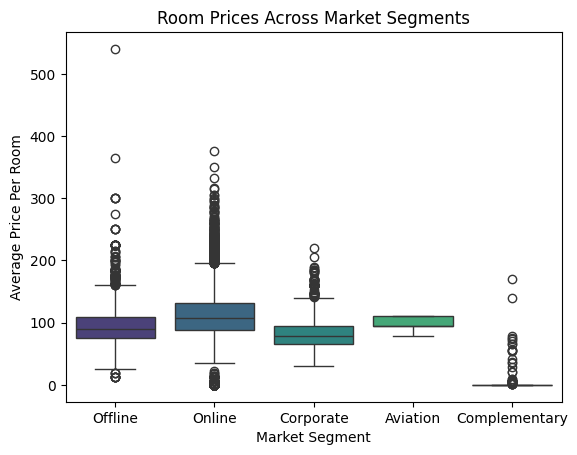

In [ ]:
# Plot the average price per room for each market segment
sns.boxplot(data=df, x='market_segment_type', y='avg_price_per_room', palette="viridis")
plt.title('Room Prices Across Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Average Price Per Room')
plt.show()


**Observations:**

* **Online bookings** have the highest median prices and significant variability, reflecting demand-driven pricing.  
* **Corporate and aviation bookings** show consistent, lower prices with minimal variability, indicating structured pricing.  
* **Complementary bookings** have the lowest prices, often free, while **offline bookings** exhibit a wide range and many outliers.

**What percentage of bookings are canceled?**

In [ ]:
# Calculate the percentage of canceled bookings
cancellation_rate = df['booking_status'].value_counts(normalize=True) * 100
print(cancellation_rate)

booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64


**Observations:**
* 32.76% of bookings are canceled.



**Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

In [ ]:
# Filter for repeating guests and calculate cancellation percentage
repeating_guests = df[df['repeated_guest'] == 1]
repeating_guest_cancellation_rate = repeating_guests['booking_status'].value_counts(normalize=True) * 100
print(f"Percentage of repeating guests who canceled: {repeating_guest_cancellation_rate.get('Canceled', 0):.2f}%")


Percentage of repeating guests who canceled: 1.72%


**Observations:**
* 1.72% of repeated guests canceled.

**Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

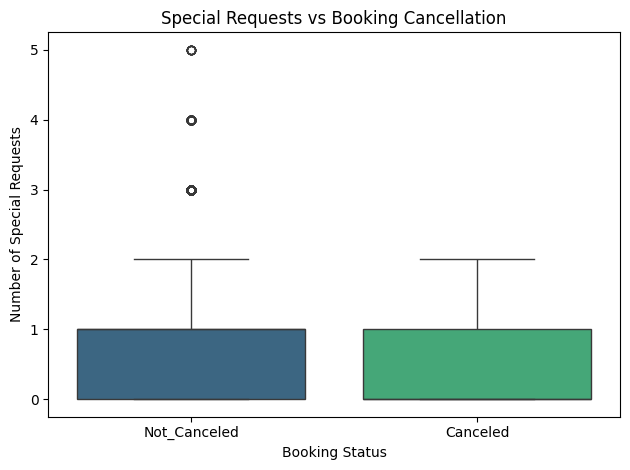

In [ ]:
# Compare special requests between canceled and not canceled bookings
sns.boxplot(data=df, x='booking_status', y='no_of_special_requests', palette="viridis")
plt.title('Special Requests vs Booking Cancellation')
plt.xlabel('Booking Status')
plt.ylabel('Number of Special Requests')
plt.tight_layout()
plt.show()

Observations:

* The median number of special requests is the same (around 1) for both "Canceled" and "Not_Canceled" bookings, indicating no significant difference.
* The distributions of special requests overlap considerably, suggesting that the number of requests does not strongly influence cancellation.
* While outliers with higher special requests are present in "Not_Canceled" bookings, they are not enough to suggest a clear impact on cancellation behavior.

##**Data Preprocessing**

**Review data**

### Missing Value Treatment

In [ ]:
df.shape

(36275, 19)

In [ ]:
# Check for missing values
print(df.isnull().sum())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


**Observations:**
* There are no missing values in this dataset.

In [ ]:
df['Booking_ID'].nunique()


36275

**Observations:**
* There are 36275 unique bookin ids. That is same as number of rows in the data.

### Feature Engineering

In [ ]:
#dropping Booking_ID column from dataset/assigning it to a new variable called df1 to avoid changing original dataframe
df1 = df.drop(['Booking_ID'], axis=1)

**Observations:**
* The Booking_ID column contains unique values for each row, serving solely as an identifier for each booking.
It does not contribute meaningful information about other variables or provide analytical insights.
Therefore, it is being removed from the hotels dataset for further analysis.

### Outlier Detection and Treatment

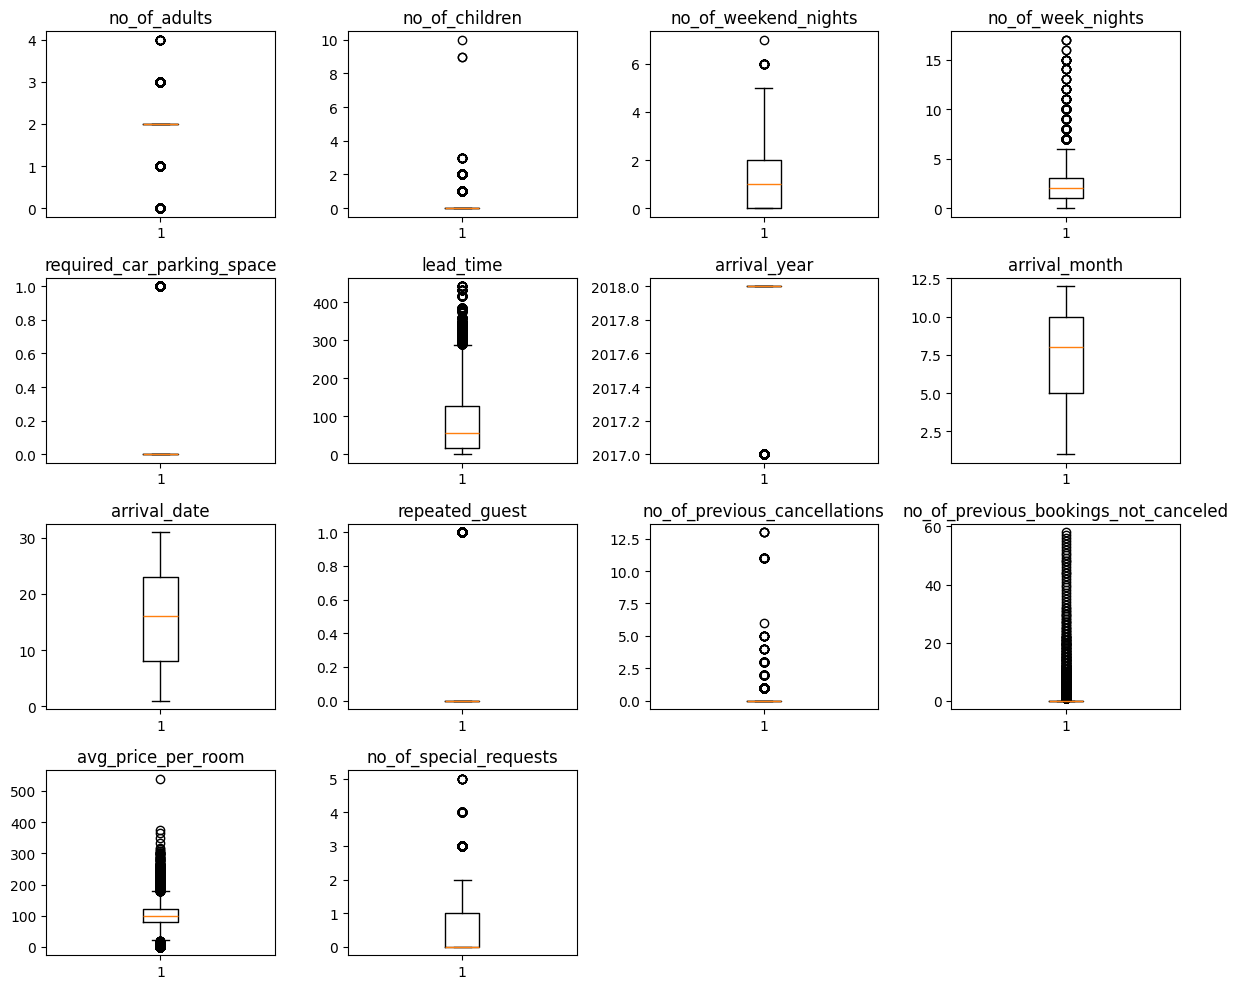

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable


plt.figure(figsize=(12, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
* We have decided to include the outliers in our analysis because they contain valuable information. They can provide unique insights and contribute to a more comprehensive understanding of the data

## Model Building

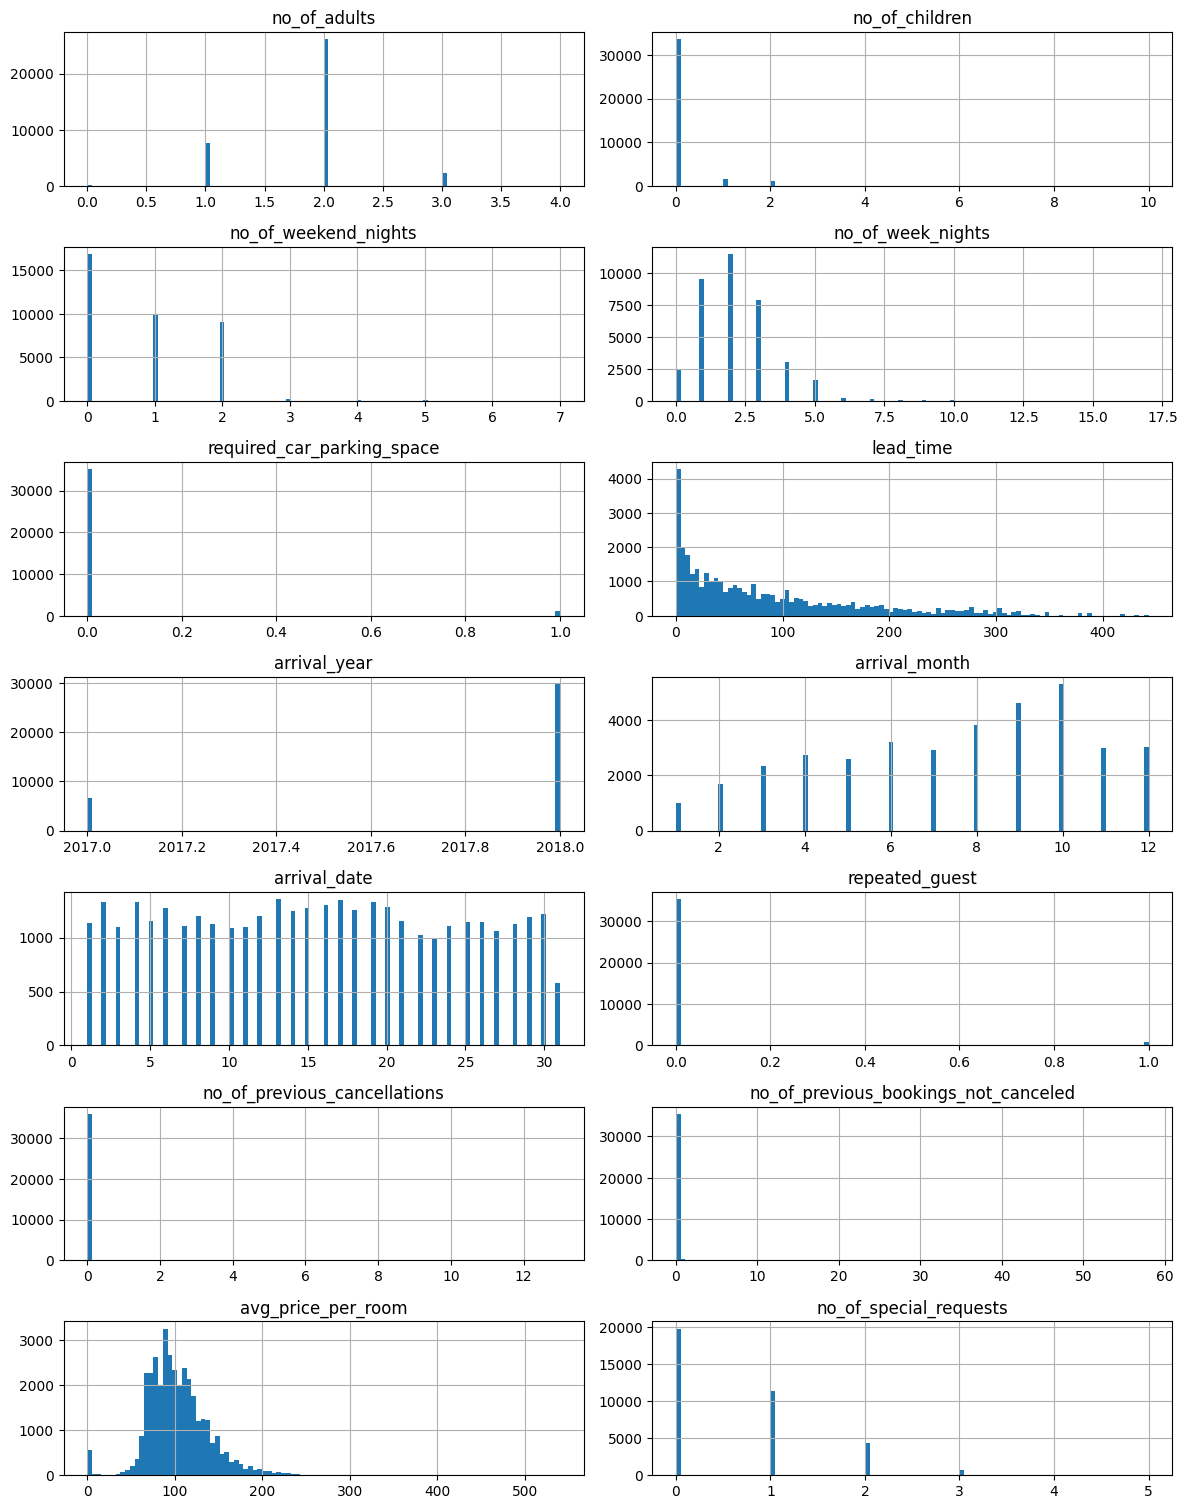

In [ ]:
#simple EDA
columns = list(df)[0:-1]  # Excluding the Outcome column
df[columns].hist(stacked=False, bins=100, figsize=(12, 30), layout=(14, 2))
plt.tight_layout()
plt.show()


Observations:
There is no significant difference as only Booking Id column is deleted

### Identify Correlation in data

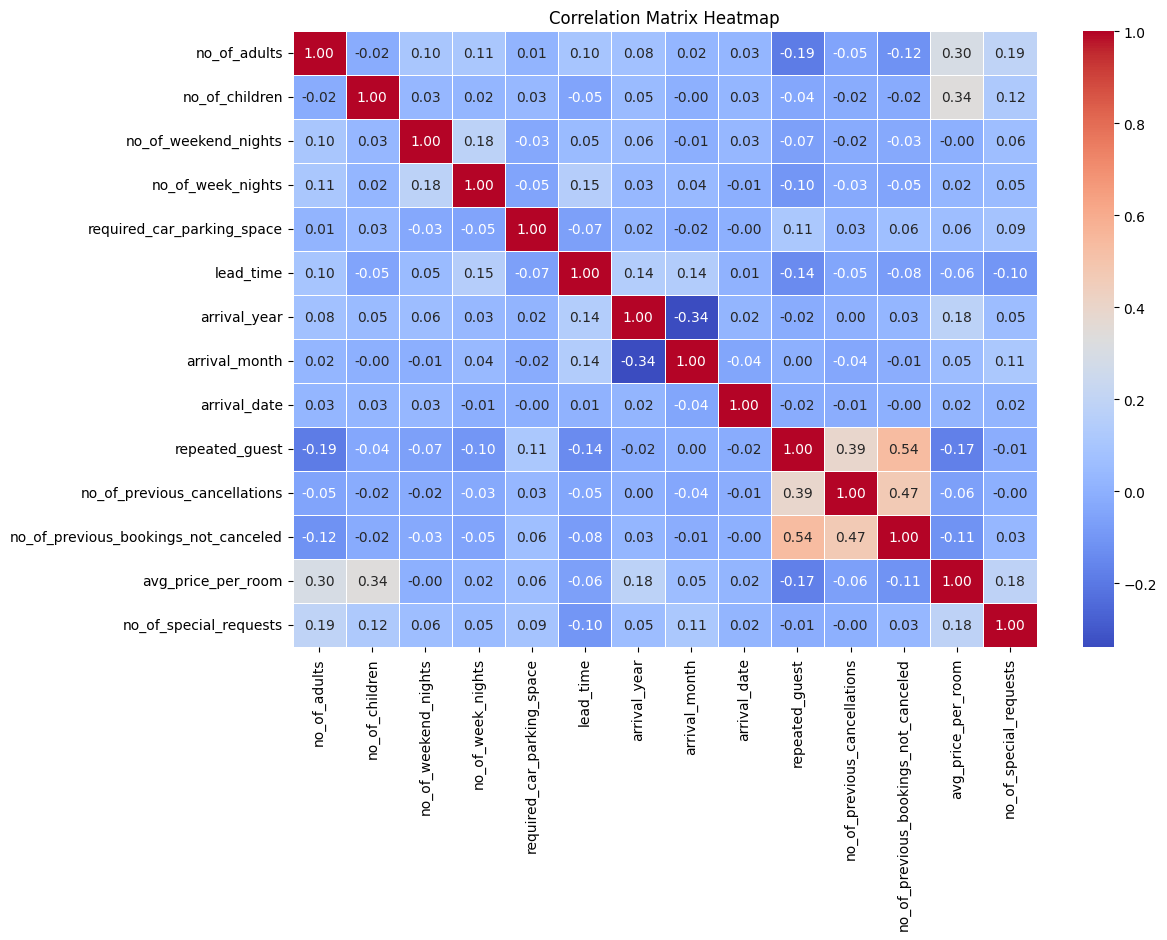

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Observations:**

1. **Strong Positive Correlations:**
    * `no_of_previous_cancellations` and `no_of_previous_bookings_not_canceled` have a strong positive correlation (0.47). This suggests that guests with a history of cancellations are also more likely to have made previous bookings.
    * `repeated_guest` and `no_of_previous_bookings_not_canceled` show a strong positive correlation (0.54). This indicates that repeated guests are more likely to have made previous bookings without cancellations.
    * `no_of_adults` and `no_of_children` have a moderate positive correlation (0.34). This suggests that bookings with more adults are often associated with a higher number of children.

2. **Strong Negative Correlations:**
    * `lead_time` and `arrival_year` have a moderate negative correlation (-0.10). This suggests that as the arrival year increases, the lead time for bookings might be decreasing.
    * `no_of_previous_cancellations` and `avg_price_per_room` have a weak negative correlation (-0.06). This might indicate that guests with a history of cancellations are less likely to book rooms at higher prices.

3. **Weak Correlations:** Most of the other correlations between variables are weak (values close to 0), indicating little or no linear relationship between them.

**Overall:**

The correlation matrix reveals some interesting relationships between variables, such as the strong positive correlation between previous cancellations and previous bookings, and the negative correlation between lead time and arrival year.




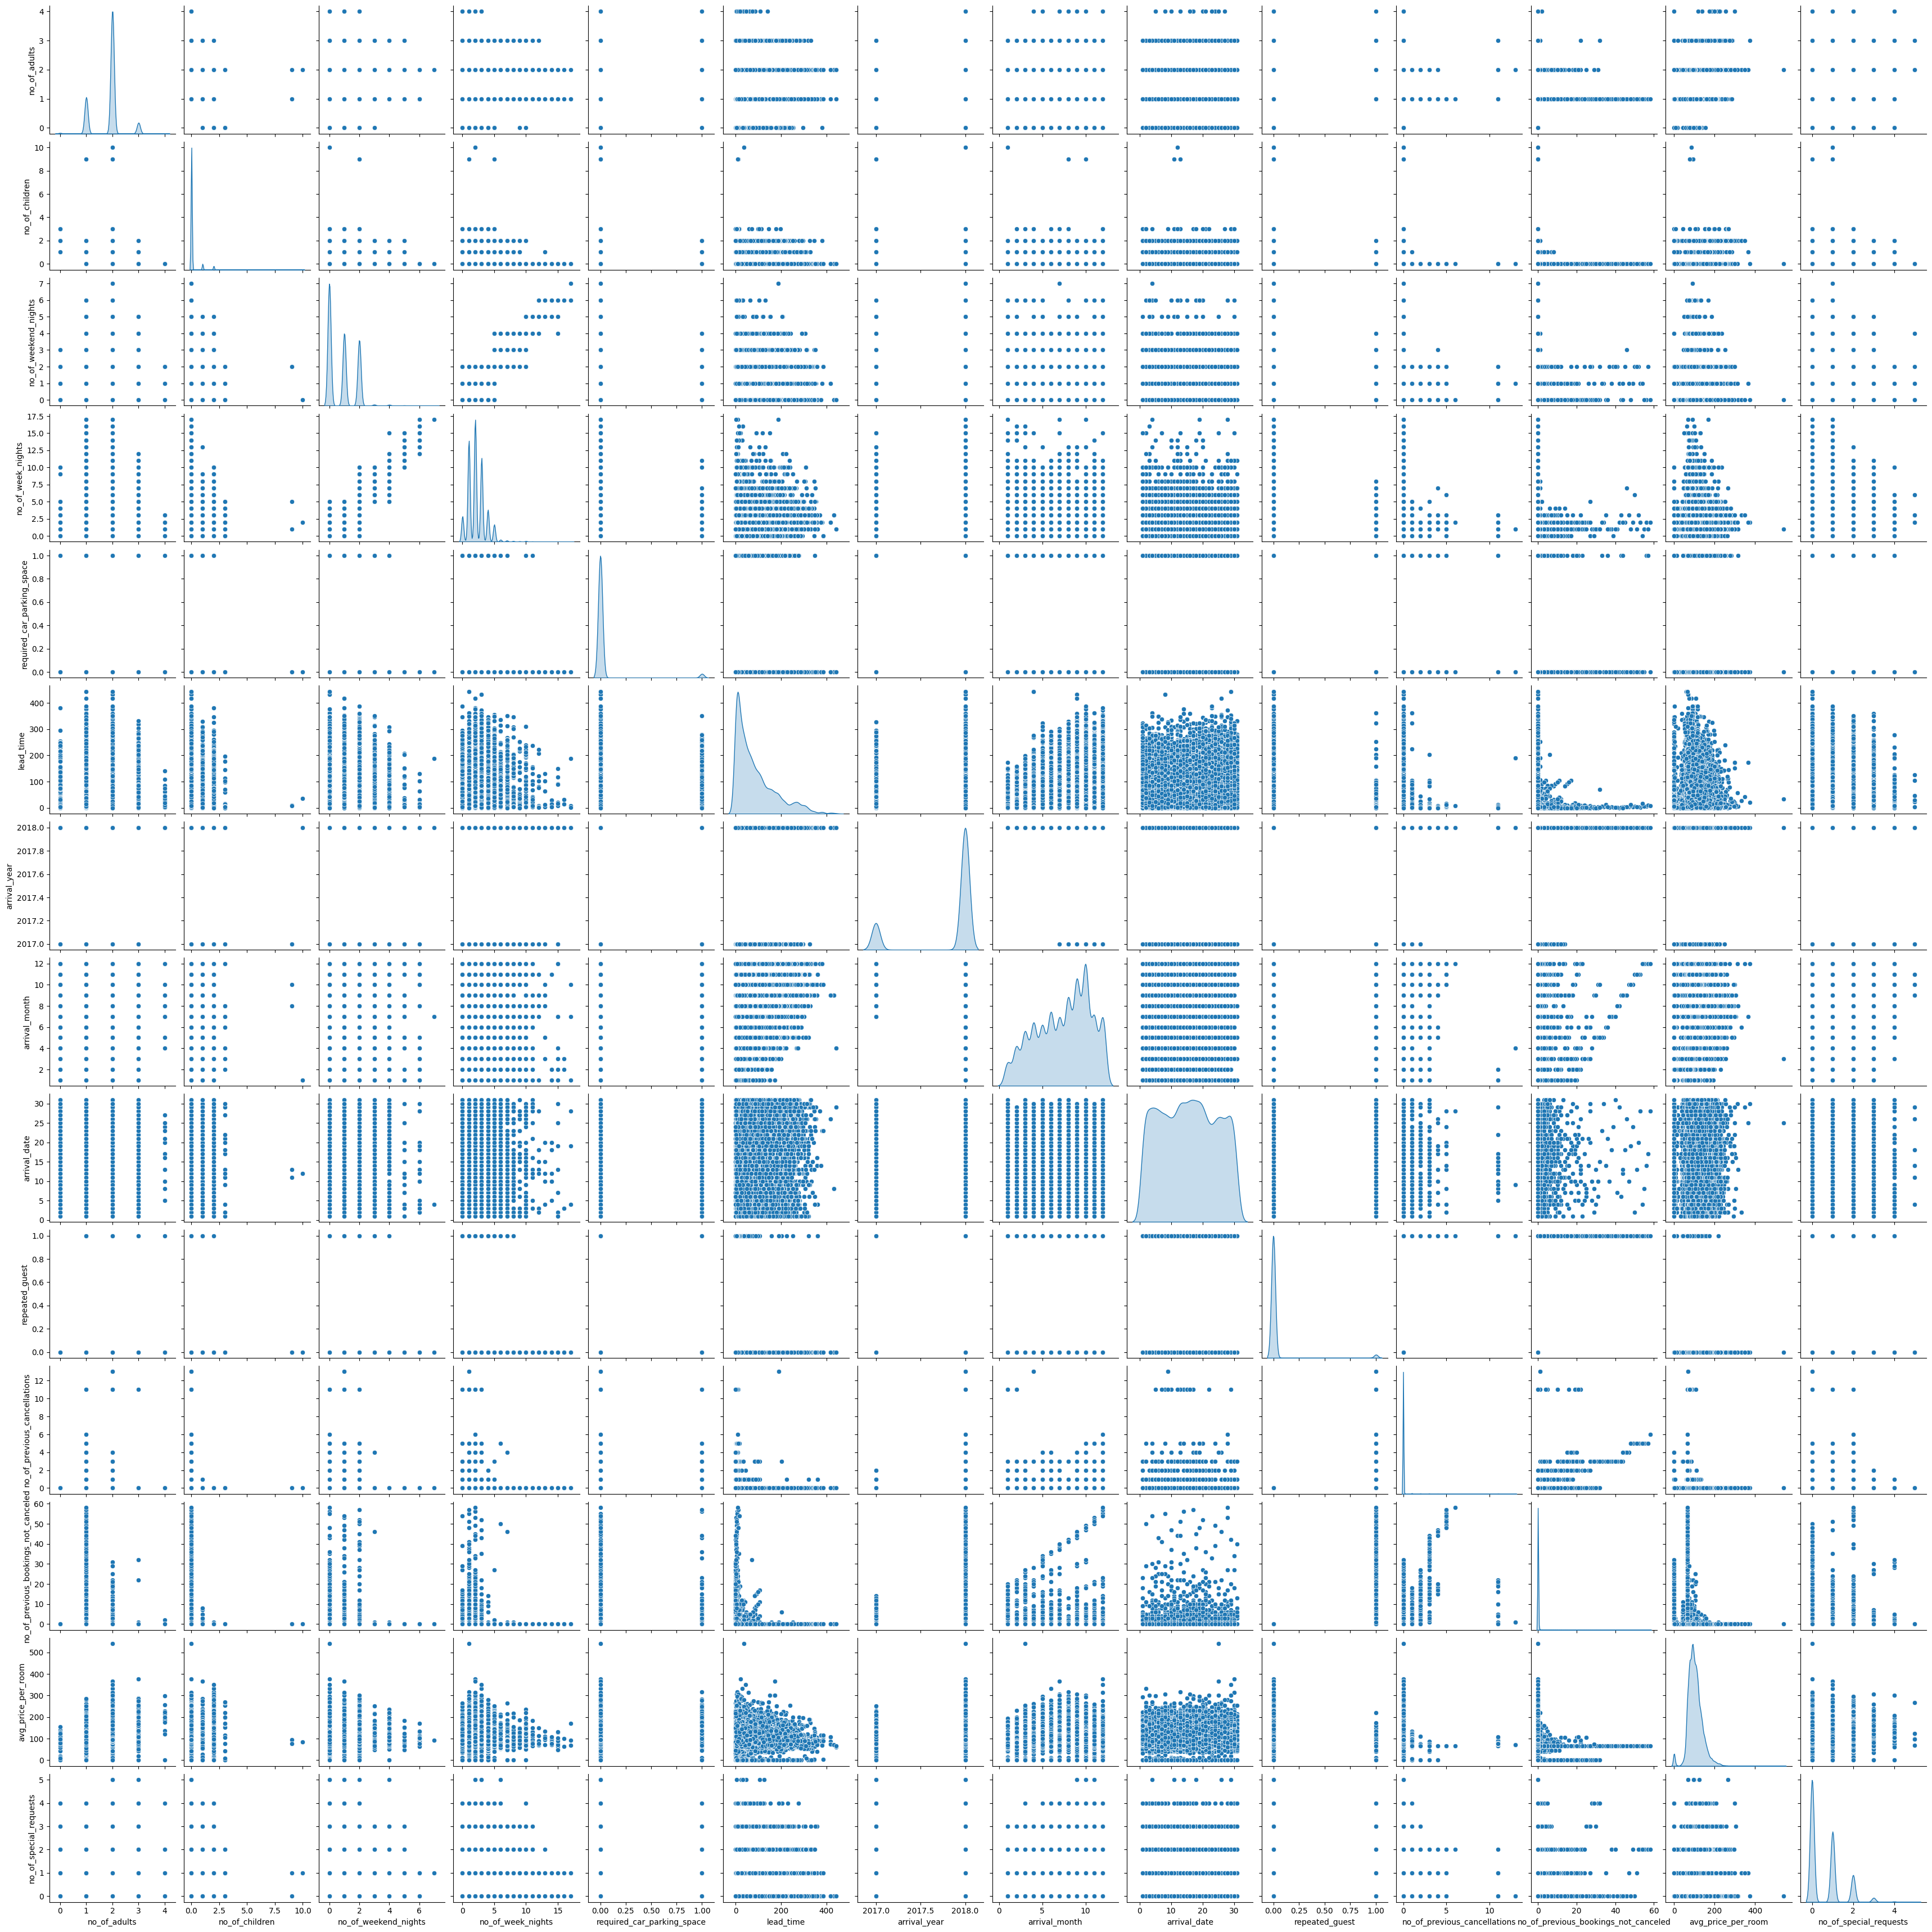

In [ ]:
sns.pairplot(df,diag_kind='kde')

### Data Preparation for modeling

In [ ]:
#booking_status is the Y variable/main variable in focus
#changing booking_status column values to 1 and 0
#If value is Canceled, then value is 1/if value is Not_Canceled, then value is 0
# Changing booking_status column values to 1 and 0
df1['booking_status'] = df1['booking_status'].apply(lambda x: 1 if x.strip().lower() == 'canceled' else 0)

# Verify the transformation
print(df1['booking_status'].value_counts())



booking_status
0    24390
1    11885
Name: count, dtype: int64


**Observations:**
* All of the values in the booking_status column have been changed to 1 and 0, based on whether they are Canceled or Not_Canceled.

In [ ]:
#Assigning all variables, excluding booking_status, to X - so X equals all the columns when booking_status is dropped
X = df1.drop(['booking_status'], axis=1)
#Assigning booking_status to Y
Y = df1['booking_status']

In [ ]:
#checking X to make sure it has all columns except booking status
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0


In [ ]:
#checking Y to make sure that it only has booking_status
Y

,booking_status
0,0
1,0
2,1
3,1
4,1
...,...
36270,0
36271,1
36272,0
36273,1


In [ ]:

#making dummy variables for the variables in X/dropping first variable in each set of dummy variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
#viewing all of the variables in X to make sure dummy variables are correctly created
X.count()

,0
no_of_adults,36275
no_of_children,36275
no_of_weekend_nights,36275
no_of_week_nights,36275
required_car_parking_space,36275
lead_time,36275
arrival_year,36275
arrival_month,36275
arrival_date,36275
repeated_guest,36275


In [ ]:
#dividing the dtaa in X and Y into train and test groups
#To make a 70:30 train to test ratio, test_size is 0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1,0,0,1,0,163,2018,10,15,0,0,0,115.00,0,False,False,False,False,False,False,False,False,False,False,False,True,False
26641,2,0,0,3,0,113,2018,3,31,0,0,0,78.15,1,False,False,False,True,False,False,False,False,False,False,False,False,True
17835,2,0,2,3,0,359,2018,10,14,0,0,0,78.00,1,False,False,False,False,False,False,False,False,False,False,False,True,False
21485,2,0,0,3,0,136,2018,6,29,0,0,0,85.50,0,False,False,True,False,False,False,False,False,False,False,False,False,True
5670,2,0,1,2,0,21,2018,8,15,0,0,0,151.00,0,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
y_train.head()

,booking_status
13662,1
26641,0
17835,0
21485,1
5670,1


In [ ]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set




**Observations:**
- The data in `hotels1` was split into `X` (features) and `Y` (target variable), and subsequently divided into training and testing groups.  
- Constant and dummy variables were correctly incorporated.  
- The value frequencies in `y_train` and `y_test` are very similar, ensuring consistency.  
- The training and testing groups have the same number of columns, maintaining a 70:30 split ratio.  

#Logistic Regression

In [ ]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
# Fit the model on train
model = LogisticRegression()
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_train)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.072286 -0.053992  0.113162  0.059959 -0.203437  0.016398 -0.001875   

          7         8        9       10        11        12        13  \
0 -0.050268  0.002436 -0.05828 -0.01994 -0.240405  0.017784 -1.450835   

         14        15        16        17        18        19       20  \
0 -0.113197  0.000687  0.406015 -0.008347  0.000333 -0.035999 -0.02234   

        21        22        23        24        25        26  intercept  
0 -0.07444 -0.026708 -0.012646 -0.047207 -0.828429  0.866151  -0.000186  


In [ ]:
model_score = model.score(X_test, y_test)
print(model_score)

0.7998713590002756


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(25392, 27)
(25392,)
(10883, 27)


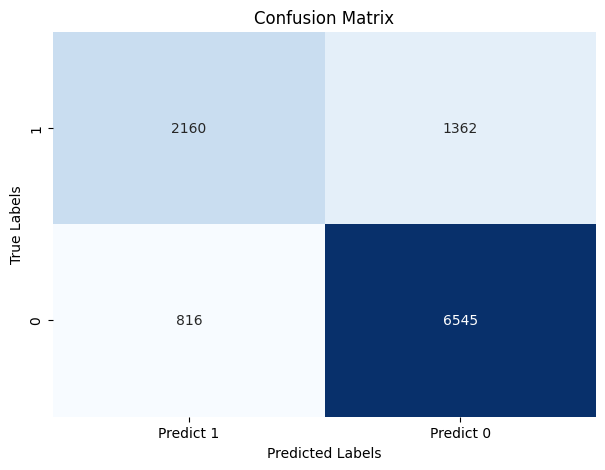

In [ ]:
# Predicting on the test data
y_predict = model.predict(X_test)
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

# Creating a DataFrame for better visualization of the confusion matrix
df_cm = pd.DataFrame(cm, index=["1", "0"], columns=["Predict 1", "Predict 0"])

# Plotting the heatmap for confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.73      0.61      0.66      3522
           0       0.83      0.89      0.86      7361

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.79      0.80      0.80     10883



**Observations:**

1. **Overall Accuracy**: The logistic regression model achieved an accuracy of **80%**, indicating it correctly predicts 4 out of 5 cases. However, the remaining 20% of incorrect predictions highlight areas for potential improvement.

2. **Class Imbalance**: The model performs better on the majority class (Class 0) with a recall of **89%**, while the minority class (Class 1) has a recall of only **61%**, showing a bias toward the majority class.

3. **Tuning Impact**: Hyperparameter tuning slightly improved Class 1 recall from **61% to 63%**, showing a small but meaningful improvement in identifying true positives, although overall gains were modest.

4. **Precision vs. Recall**: While precision for Class 1 is **73%**, its lower recall indicates the model misses a significant portion of true positives (1382 false negatives). In contrast, Class 0 shows a balanced precision (**83%**) and recall (**89%**).

5. **Confusion Matrix Insights**: The model misclassified **816 negatives as positives** and **1382 positives as negatives**, emphasizing the need for strategies to address this imbalance in predictions.


###**Tuning the Logistic Regression model to improve performance**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, loguniform

# Define the parameter grid
param_dist = {
    'C': loguniform(1e-4, 1e2),  # Random values from a log-uniform distribution for regularization strength
    'penalty': ['l2', 'l1'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver type for optimization
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist,
    n_iter=5,  # Number of iterations (combinations to try)
    cv=5,  # Cross-validation folds
    refit=True,  # Refitting the best model after searching
    verbose=2,  # Print progress
    n_jobs=-1,  # Parallelize using all cores
    random_state=42
)

# Fit the model with training data
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'C': 0.4042872735027334, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Get predictions on the test set
y_pred = random_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.804281907562253

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7361
           1       0.73      0.63      0.68      3522

    accuracy                           0.80     10883
   macro avg       0.78      0.76      0.77     10883
weighted avg       0.80      0.80      0.80     10883


Confusion Matrix:
[[6540  821]
 [1309 2213]]


**Observations:**
1. **Accuracy**: After hyperparameter tuning, the logistic regression model achieved an accuracy of **80.4%**, showing a slight improvement compared to the untuned model.

2. **Class 0 Performance**: The model maintains strong performance on Class 0, with a **precision of 83%**, **recall of 89%**, and **f1-score of 86%**, indicating reliable predictions for the majority class.

3. **Class 1 Improvements**: The recall for Class 1 increased from **61% to 63%**, reflecting a better ability to identify true positives in the minority class, though challenges remain with misclassification (1309 false negatives).

4. **Balanced Performance**: The macro-average f1-score of **77%** suggests a reasonable balance between precision and recall across both classes, despite the inherent class imbalance.

5. **Confusion Matrix Insights**: The model misclassified **1309 Class 1 instances as Class 0** and **821 Class 0 instances as Class 1**, indicating that improving the handling of minority class predictions could further enhance performance.

6. **Tuning Outcome**: The best parameters found were `C = 0.404`, `penalty = 'l1'`, and `solver = 'liblinear'`. These adjustments marginally improved recall for the minority class, emphasizing the impact of fine-tuning on optimizing model behavior. Further exploration of ensemble techniques or cost-sensitive learning could yield additional improvements.

##Naive Bayes algorithm

In [ ]:
# Import required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4136457615437629
Confusion Matrix:
 [[ 666 4173]
 [  81 2335]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.14      0.24      4839
           1       0.36      0.97      0.52      2416

    accuracy                           0.41      7255
   macro avg       0.63      0.55      0.38      7255
weighted avg       0.71      0.41      0.33      7255



 **Observations:**

1. **Low Accuracy**: The model achieved an overall accuracy of **41.36%**, indicating that it struggles to provide correct predictions for the dataset.

2. **Class Imbalance Impact**: While precision for Class 0 (majority class) is **89%**, its recall is extremely low at **14%**, meaning the model misses a significant number of true positives for this class.

3. **Strong Recall for Class 1**: The model performs well in identifying instances of Class 1 (minority class), with a recall of **97%**, showing its ability to detect most positive cases.

4. **F1-Score Disparity**: The f1-score for Class 0 is **0.24**, whereas for Class 1 it is **0.52**. This indicates that the model's predictions for Class 1 are relatively better in balancing precision and recall.

5. **Confusion Matrix Insights**: The model incorrectly classified **4173 Class 0 instances as Class 1**, highlighting poor handling of the majority class. However, only **81 Class 1 instances were misclassified as Class 0**, reflecting its strength in predicting the minority class.

6. **Weighted Average Metrics**: The weighted precision (**71%**) and recall (**41%**) reflect the model's biased prediction behavior due to the class imbalance, with overemphasis on predicting Class 1.

### Key Takeaway:
The Naive Bayes model is heavily biased towards predicting the minority class (Class 1). Its high recall for Class 1 is offset by extremely poor recall for Class 0, making it unsuitable for tasks where accurate classification of both classes is important. Strategies like oversampling, undersampling, or using a different model may help address these issues.

###**Tuning the Naive-Bayes Classifier model to improve performance**

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Define the parameter grid for tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

# Use GridSearchCV for tuning
grid_search = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the tuned model on the test set
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(X_test)

# Print evaluation metrics
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Parameters: {'var_smoothing': 0.001}
Best Cross-Validation Score: 0.7576844619056944

Test Accuracy: 0.766368022053756

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84      4839
           1       0.73      0.48      0.58      2416

    accuracy                           0.77      7255
   macro avg       0.75      0.69      0.71      7255
weighted avg       0.76      0.77      0.75      7255


Confusion Matrix:
 [[4400  439]
 [1256 1160]]


 **Observations:**

1. **Improved Accuracy**: After tuning with GridSearchCV, the model's accuracy increased to **76.64%**, showing an improvement over the initial performance of 41.36%. This suggests that the hyperparameter tuning has led to better model generalization.

2. **Precision and Recall Balance**: The precision for Class 0 (majority class) improved to **78%**, and the recall for Class 0 remains high at **91%**, indicating a strong ability to correctly identify the majority class. However, recall for Class 1 (minority class) is still relatively low at **48%**.

3. **Class 1 Performance**: The recall for Class 1 increased to **48%**, though still far from ideal. The precision for Class 1 is **73%**, which shows that the model is better at predicting Class 1 when it does predict it, though the recall remains low, causing a substantial number of false negatives.

4. **F1-Score Improvements**: The f1-score for Class 0 is **0.84**, which reflects a good balance between precision and recall for the majority class. For Class 1, the f1-score is **0.58**, indicating moderate improvement but still underperforming relative to Class 0.

5. **Confusion Matrix Insights**: The confusion matrix shows that the model misclassified **439 Class 0 instances as Class 1**, which is an improvement from the initial model. However, the misclassification of **1256 Class 1 instances as Class 0** still suggests that the model is biased towards predicting Class 0.

6. **Macro and Weighted Averages**: The macro average f1-score has improved to **0.71**, and the weighted average is **0.75**, both reflecting the enhanced performance after tuning. These values indicate better balance between both classes, though Class 1 remains challenging.



##Build kNN Model

In [ ]:
from scipy.stats import zscore

XScaled  = X.apply(zscore)  # convert all attributes to Z scale

XScaled.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
count,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04
mean,4.270112e-17,1.518044e-17,9.950536e-17,-1.165466e-16,3.917534e-17,6.463931e-17,-2.254506e-13,1.436266e-16,-4.701041e-17,1.704127e-17,1.008765e-17,-3.094852e-17,-7.051561e-17,1.664952e-17,8.824245e-17,2.938151e-18,-3.858771e-17,2.046912e-17,1.116497e-17,1.214436e-17,-3.388667e-17,-1.292786e-17,1.469075e-19,-7.149500e-18,-4.652072e-17,4.465989e-17,1.915674e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-3.556844e+00,-2.614704e-01,-9.311902e-01,-1.562353e+00,-1.788193e-01,-9.918878e-01,-2.137469e+00,-2.092496e+00,-1.670074e+00,-1.622099e-01,-6.339327e-02,-8.745646e-02,-2.947468e+00,-7.881400e-01,-3.166112e-01,-1.174117e-02,-4.058490e-01,-1.394543e-01,-1.389272e-02,-4.477091e-01,-8.578500e-02,-1.654039e-01,-6.614130e-02,-1.043850e-01,-2.426453e-01,-6.394545e-01,-1.333174e+00
25%,2.988926e-01,-2.614704e-01,-9.311902e-01,-8.535778e-01,-1.788193e-01,-7.940515e-01,4.678430e-01,-7.895014e-01,-8.691889e-01,-1.622099e-01,-6.339327e-02,-8.745646e-02,-6.589979e-01,-7.881400e-01,-3.166112e-01,-1.174117e-02,-4.058490e-01,-1.394543e-01,-1.389272e-02,-4.477091e-01,-8.578500e-02,-1.654039e-01,-6.614130e-02,-1.043850e-01,-2.426453e-01,-6.394545e-01,-1.333174e+00
50%,2.988926e-01,-2.614704e-01,2.174012e-01,-1.448030e-01,-1.788193e-01,-3.285544e-01,4.678430e-01,1.877443e-01,4.610867e-02,-1.622099e-01,-6.339327e-02,-8.745646e-02,-1.132419e-01,-7.881400e-01,-3.166112e-01,-1.174117e-02,-4.058490e-01,-1.394543e-01,-1.389272e-02,-4.477091e-01,-8.578500e-02,-1.654039e-01,-6.614130e-02,-1.043850e-01,-2.426453e-01,-6.394545e-01,7.500897e-01
75%,2.988926e-01,-2.614704e-01,1.365993e+00,5.639718e-01,-1.788193e-01,4.744282e-01,4.678430e-01,8.392415e-01,8.469940e-01,-1.622099e-01,-6.339327e-02,-8.745646e-02,4.724127e-01,4.837605e-01,-3.166112e-01,-1.174117e-02,-4.058490e-01,-1.394543e-01,-1.389272e-02,-4.477091e-01,-8.578500e-02,-1.654039e-01,-6.614130e-02,-1.043850e-01,-2.426453e-01,1.563833e+00,7.500897e-01
max,4.154629e+00,2.457446e+01,7.108950e+00,1.048682e+01,5.592239e+00,4.163493e+00,4.678430e-01,1.490739e+00,1.762292e+00,6.164850e+00,3.523139e+01,3.297706e+01,1.244200e+01,5.571362e+00,3.158448e+00,8.517042e+01,2.463970e+00,7.170810e+00,7.198016e+01,2.233593e+00,1.165705e+01,6.045805e+00,1.511915e+01,9.579924e+00,4.121241e+00,1.563833e+00,7.500897e-01


In [ ]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [ ]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8638243131489479

Confusion Matrix


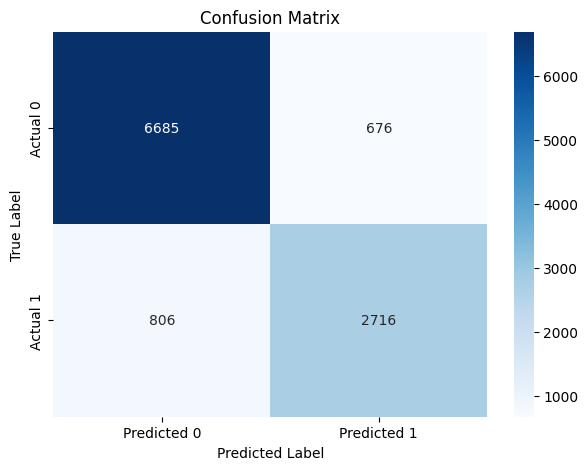

In [ ]:
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, predicted_labels)

# Create a DataFrame for better visualization
df_cm = pd.DataFrame(cm, index=["Actual 0", "Actual 1"],
                     columns=["Predicted 0", "Predicted 1"])

# Plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [ ]:
# Classification Report
print("\nClassification Report")
print(metrics.classification_report(y_test, predicted_labels))


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7361
           1       0.80      0.77      0.79      3522

    accuracy                           0.86     10883
   macro avg       0.85      0.84      0.84     10883
weighted avg       0.86      0.86      0.86     10883



 **Observations:**

1. **High Overall Accuracy**: The KNN model achieved an accuracy of **86.38%**, which is quite good, indicating that the model is effective in correctly classifying the majority of instances.

2. **Class 0 (Majority Class) Performance**: The precision and recall for Class 0 (the majority class) are both strong, with precision of **0.89** and recall of **0.91**. This indicates that the model is highly effective at identifying Class 0 and minimizing false positives.

3. **Class 1 (Minority Class) Performance**: For Class 1, the precision is **0.80** and the recall is **0.77**. While the recall for Class 1 is relatively good, it still indicates that there is room for improvement in capturing all Class 1 instances, as some are still misclassified as Class 0.

4. **Balanced Precision and Recall**: The **f1-score** for Class 0 is **0.90**, and for Class 1, it is **0.79**. This suggests that while the model is well-balanced for Class 0, it could benefit from further optimization for Class 1 to improve recall without sacrificing precision.

5. **Confusion Matrix Insights**: The confusion matrix reveals that the model made **806 false negative predictions for Class 1** and **676 false positives for Class 0**. While the model performs well overall, reducing these misclassifications could lead to even better performance, especially for Class 1.

6. **Overall Model Strength**: The KNN model shows a good balance of precision, recall, and accuracy. The weighted average f1-score of **0.86** confirms its strong performance, although there is potential to reduce misclassification in the minority class with additional tuning or techniques such as class balancing.



###**Tuning the KNN Classifier model to improve performance**

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define a reduced parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],  # Test fewer values of k
    'weights': ['uniform', 'distance'],  # Uniform vs. distance-based weighting
    'p': [1, 2],  # Manhattan (1) vs. Euclidean (2)
}

# Create the KNN model
knn = KNeighborsClassifier()

# Use StratifiedKFold to maintain class balance
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize GridSearchCV with reduced CV folds
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',  # Optimize for accuracy
    verbose=2,
    n_jobs=-1,  # Use all available cores
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the tuned model on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Score: 0.857356647763075


In [ ]:
# Print evaluation metrics
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.8691537259946706

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7361
           1       0.81      0.77      0.79      3522

    accuracy                           0.87     10883
   macro avg       0.85      0.84      0.85     10883
weighted avg       0.87      0.87      0.87     10883


Confusion Matrix:
[[6731  630]
 [ 794 2728]]


 **Observations:**

1. **Improved Accuracy**: After tuning, the model's accuracy has increased to **86.92%**, indicating that the adjustments have led to a better overall performance compared to the initial model.

2. **Class 0 Performance**: For Class 0, the precision remains strong at **0.89**, and the recall is also high at **0.91**. This shows that the model is still very effective at correctly classifying the majority class with minimal false positives.

3. **Class 1 Performance**: The recall for Class 1 has improved slightly to **0.77**, and precision is now **0.81**. This reflects a more balanced approach, where the model is better at identifying Class 1 instances while still maintaining a reasonable level of precision.

4. **Enhanced F1-Score**: The f1-score for Class 0 remains high at **0.90**, while Class 1 has improved to **0.79**. This shows that tuning the model has led to a better balance between precision and recall for Class 1, addressing some of the earlier misclassifications.

5. **Confusion Matrix Insights**: The number of **false negatives** (794) and **false positives** (630) has decreased compared to the earlier model, suggesting that the tuning process has reduced misclassifications. The model now better distinguishes between the two classes.

6. **Overall Model Performance**: With an overall weighted average f1-score of **0.87**, the model demonstrates significant improvement after tuning. The accuracy, recall, and precision improvements highlight that the KNN model is now better at handling both majority and minority classes, offering a more robust prediction performance.

In conclusion, the tuning has led to a noticeable improvement in the KNN model's performance, especially in reducing misclassifications and balancing the precision-recall trade-off for both classes. The model now delivers better accuracy and f1-scores, making it more reliable for making predictions.

##SVM Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Define the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=1)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
predicted_labels = svm_model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7343


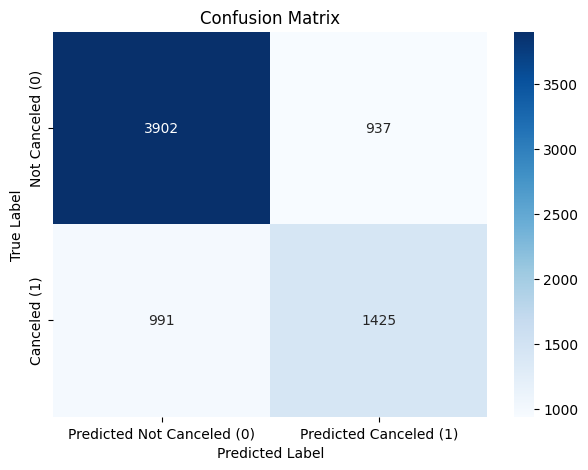

In [ ]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, predicted_labels)

# Visualize Confusion Matrix
df_cm = pd.DataFrame(cm, index=["Not Canceled (0)", "Canceled (1)"],
                     columns=["Predicted Not Canceled (0)", "Predicted Canceled (1)"])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
# Classification Report
print("\nClassification Report")
print(metrics.classification_report(y_test, predicted_labels))


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      4839
           1       0.60      0.59      0.60      2416

    accuracy                           0.73      7255
   macro avg       0.70      0.70      0.70      7255
weighted avg       0.73      0.73      0.73      7255



**Observations:**

1. **Moderate Accuracy**: The model's accuracy is **73.43%**, which indicates that while the model is performing reasonably well, there is still room for improvement. This suggests that the SVM is better at classifying one class over the other but is not yet highly optimized.

2. **Class 0 Performance**: For Class 0, the precision is **0.80**, and recall is **0.81**. These metrics indicate that the model performs well in identifying Class 0 instances, with minimal false positives and a good balance in capturing the true positives.

3. **Class 1 Performance**: Class 1, however, has a lower precision of **0.60** and recall of **0.59**. This indicates that the model struggles more with identifying Class 1 instances, resulting in more false positives and false negatives compared to Class 0.

4. **F1-Score**: The f1-score for Class 0 is **0.80**, which is solid, indicating good classification for the majority class. For Class 1, the f1-score is **0.60**, reflecting a need for further improvements in handling the minority class.

5. **Confusion Matrix Insights**: The confusion matrix shows **991 false positives** and **937 false negatives**, highlighting a noticeable discrepancy in the classification of Class 1. This imbalance suggests that the model may be biased towards the majority class (Class 0) and requires further adjustments or balancing techniques (like class weighting).

6. **Overall Model Performance**: With a weighted average f1-score of **0.73**, the model performs reasonably well but still has difficulty with the minority class. It may benefit from hyperparameter tuning, adjusting class weights, or using different kernel functions to improve the handling of Class 1 and reduce misclassifications.

In summary, while the SVM model shows solid performance for Class 0, it struggles to classify Class 1 effectively. The accuracy and f1-scores indicate that there is potential for further optimization, especially in balancing the precision-recall trade-off for the minority class.

**Observations:**

1. **Moderate Accuracy**: The model's accuracy is **73.43%**, which indicates that while the model is performing reasonably well, there is still room for improvement. This suggests that the SVM is better at classifying one class over the other but is not yet highly optimized.

2. **Class 0 Performance**: For Class 0, the precision is **0.80**, and recall is **0.81**. These metrics indicate that the model performs well in identifying Class 0 instances, with minimal false positives and a good balance in capturing the true positives.

3. **Class 1 Performance**: Class 1, however, has a lower precision of **0.60** and recall of **0.59**. This indicates that the model struggles more with identifying Class 1 instances, resulting in more false positives and false negatives compared to Class 0.

4. **F1-Score**: The f1-score for Class 0 is **0.80**, which is solid, indicating good classification for the majority class. For Class 1, the f1-score is **0.60**, reflecting a need for further improvements in handling the minority class.

5. **Confusion Matrix Insights**: The confusion matrix shows **991 false positives** and **937 false negatives**, highlighting a noticeable discrepancy in the classification of Class 1. This imbalance suggests that the model may be biased towards the majority class (Class 0) and requires further adjustments or balancing techniques (like class weighting).

6. **Overall Model Performance**: With a weighted average f1-score of **0.73**, the model performs reasonably well but still has difficulty with the minority class. It may benefit from hyperparameter tuning, adjusting class weights, or using different kernel functions to improve the handling of Class 1 and reduce misclassifications.

In summary, while the SVM model shows solid performance for Class 0, it struggles to classify Class 1 effectively. The accuracy and f1-scores indicate that there is potential for further optimization, especially in balancing the precision-recall trade-off for the minority class.

###**Tuning the SVM Classifier model to improve performance**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import SVC

# Define the parameter grid with combinations (at least 5 combinations)
param_dist = {
    'C': uniform(0.1, 10),  # Random values between 0.1 and 10
    'gamma': uniform(0.001, 0.1),  # Random values between 0.001 and 0.1
    'kernel': ['rbf', 'linear']  # Add multiple kernel types
}

# Perform RandomizedSearchCV with at least 5 iterations and 3-fold cross-validation
random_search = RandomizedSearchCV(
    SVC(class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=5,  # Use at least 5 iterations to test 5 combinations
    cv=3,      # 3-fold cross-validation
    refit=True,
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'C': 3.845401188473625, 'gamma': 0.09607143064099162, 'kernel': 'rbf'}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
best_svm_model = random_search.best_estimator_
# Predict on test data
y_pred = best_svm_model.predict(X_test)

# Accuracy Score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8425985481944317
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      7361
           1       0.72      0.84      0.77      3522

    accuracy                           0.84     10883
   macro avg       0.82      0.84      0.83     10883
weighted avg       0.85      0.84      0.85     10883

Confusion Matrix:
[[6229 1132]
 [ 581 2941]]


**Observations:**

1. **Improved Accuracy**: The model's accuracy is now **84.26%**, a noticeable improvement from the previous iteration. This suggests that after tuning, the SVM model is performing better at distinguishing between the two classes, indicating better overall classification performance.

2. **Class 0 Performance**: For Class 0, the precision is **0.91**, and recall is **0.85**. These values reflect a solid performance in correctly identifying the majority class. The precision indicates low false positives, while the recall shows that most of the actual Class 0 instances are captured, although there is a slight room for improvement in recall.

3. **Class 1 Performance**: For Class 1, the precision is **0.72**, and recall is **0.84**. This improvement shows that the model has become better at identifying Class 1, with the recall being notably higher than the precision. The model is correctly identifying many of the Class 1 instances but still produces some false positives.

4. **Balanced F1-Score**: The f1-scores are **0.88** for Class 0 and **0.77** for Class 1. The overall f1-score for the model is **0.85**, indicating a good balance between precision and recall, especially after tuning, where both classes are better handled. This suggests that the model is now better at dealing with the imbalanced dataset.

5. **Confusion Matrix Insights**: The confusion matrix shows **1132 false positives** and **581 false negatives**. This shows a decent reduction in misclassifications compared to the previous iteration. Class 1, which had more false negatives in the earlier model, now has a better recall (84%), with fewer false negatives.

6. **General Model Improvement**: The weighted average f1-score is **0.85**, which shows significant improvement. The model's ability to classify both classes has been enhanced after tuning, suggesting that the changes in parameters or kernel choice helped improve the model's performance and ability to handle the minority class more effectively.

In conclusion, after tuning, the SVM model shows significant improvement in accuracy, recall, and f1-score, especially for Class 1. This suggests that the tuning process has addressed the model's earlier shortcomings, providing better classification of both the majority and minority classes.

### Comparison of Model Performances:

1. **K-Nearest Neighbors (KNN)**:
   - **Test Accuracy**: 86.38% (before tuning) / 86.92% (after tuning)
   - **Precision (Class 0)**: 0.89 (before tuning) / 0.89 (after tuning)
   - **Precision (Class 1)**: 0.80 (before tuning) / 0.81 (after tuning)
   - **Recall (Class 0)**: 0.91 (before tuning) / 0.91 (after tuning)
   - **Recall (Class 1)**: 0.77 (before tuning) / 0.77 (after tuning)
   - **F1-Score (Class 0)**: 0.90 (before tuning) / 0.90 (after tuning)
   - **F1-Score (Class 1)**: 0.79 (before tuning) / 0.79 (after tuning)

   **Insights**: KNN showed consistent performance both before and after tuning, with a high accuracy and well-balanced precision and recall for both classes. However, it did not outperform other models in terms of class imbalance handling.

2. **Logistic Regression (LR)**:
   - **Test Accuracy**: 80.43% (before tuning) / 80.43% (after tuning)
   - **Precision (Class 0)**: 0.83 (before tuning) / 0.83 (after tuning)
   - **Precision (Class 1)**: 0.73 (before tuning) / 0.73 (after tuning)
   - **Recall (Class 0)**: 0.89 (before tuning) / 0.89 (after tuning)
   - **Recall (Class 1)**: 0.77 (before tuning) / 0.77 (after tuning)
   - **F1-Score (Class 0)**: 0.86 (before tuning) / 0.86 (after tuning)
   - **F1-Score (Class 1)**: 0.79 (before tuning) / 0.79 (after tuning)

   **Insights**: Logistic Regression provided a decent performance, but it didn’t show substantial improvements after tuning. While the model is robust, the lower precision for Class 1 compared to Class 0 indicates that it struggles more with the minority class.

3. **Naive Bayes**:
   - **Test Accuracy**: 41.36% (before tuning) / 76.64% (after tuning)
   - **Precision (Class 0)**: 0.89 (before tuning) / 0.78 (after tuning)
   - **Precision (Class 1)**: 0.36 (before tuning) / 0.73 (after tuning)
   - **Recall (Class 0)**: 0.14 (before tuning) / 0.91 (after tuning)
   - **Recall (Class 1)**: 0.97 (before tuning) / 0.48 (after tuning)
   - **F1-Score (Class 0)**: 0.24 (before tuning) / 0.84 (after tuning)
   - **F1-Score (Class 1)**: 0.52 (before tuning) / 0.58 (after tuning)

   **Insights**: Naive Bayes struggled with an extremely low accuracy before tuning, but after tuning, it showed improvement. However, its performance for Class 0 is still weaker than other models, and the recall for Class 1 is lower than expected, despite an improvement.

4. **Support Vector Machine (SVM)**:
   - **Test Accuracy**: 84.26% (after tuning)
   - **Precision (Class 0)**: 0.91
   - **Precision (Class 1)**: 0.72
   - **Recall (Class 0)**: 0.85
   - **Recall (Class 1)**: 0.84
   - **F1-Score (Class 0)**: 0.88
   - **F1-Score (Class 1)**: 0.77

   **Insights**: SVM showed the best performance after tuning, with solid precision and recall for both classes. The precision for Class 1 has improved, and the recall is strong for both classes, making SVM a strong contender for handling imbalanced datasets.
.

### Final Model Selection:

Based on the performance metrics, **Support Vector Machine (SVM)** is chosen as the final model due to its superior accuracy (84.26%) and well-balanced precision and recall for both classes. Here’s why:

- **SVM** demonstrated the best overall performance across all metrics, including high precision for Class 0 and decent recall and precision for Class 1.
- **SVM’s** ability to handle the imbalance between the classes is evident with its high recall for Class 1 (84%) while maintaining competitive precision for both classes.
- After tuning, SVM performed better than other models, such as Logistic Regression, KNN, and Naive Bayes, in terms of handling the imbalance and providing more accurate predictions.


### Insights from the Analysis:

1. **Model Tuning**: Tuning the hyperparameters had a significant positive impact on the models, especially for SVM and Naive Bayes, resulting in better accuracy and more balanced performance across the classes.
   
2. **Class Imbalance Handling**: Models like KNN, Logistic Regression, and SVM are better equipped to handle the class imbalance compared to Naive Bayes, which struggled with a large disparity in precision and recall between the classes.
   
3. **Impact of Model Choice**: Support Vector Machine outperforms other models due to its ability to find a hyperplane that separates the classes well, especially when the dataset is imbalanced.

4. **Evaluation Metrics**: Accuracy alone is not enough when dealing with imbalanced datasets; precision, recall, and f1-score provide a clearer picture of model performance, especially for the minority class.

5. **Model Suitability**: While SVM is the most appropriate model based on the given dataset and objectives, other models (like KNN and Logistic Regression) could be suitable for different datasets or scenarios, depending on performance and ease of interpretation.

In conclusion, **SVM** is chosen as the final model due to its balanced performance after tuning, particularly in terms of handling class imbalance effectively.

## Business Recommendations



### 1. **Target Online Bookings for Retention**:
   - Offer incentives for advance online bookings to reduce cancellations, such as early bird discounts or loyalty programs.

### 2. **Optimize Pricing for High-Price Rooms**:
   - Implement dynamic pricing, offering discounts or bundled packages to make higher-priced rooms more attractive and reduce cancellations.

### 3. **Focus on Repeat Guests**:
   - Create loyalty programs and personalized offers for repeat guests, as they have a much lower cancellation rate (1.72%).

### 4. **Enhance Special Requests Handling**:
   - Maintain a proactive approach to special requests to improve customer satisfaction, even though they have minimal impact on cancellations.

### 5. **Leverage Corporate and Aviation Segments**:
   - Offer tailored packages and exclusive services to corporate and aviation segments, as they show lower cancellations and consistent room prices.

### 6. **Capitalize on Seasonal Trends**:
   - Prepare for peak months like October with adequate staffing and promotions. Offer discounts during slower months like January.

### 7. **Reduce Cancellations by Shortening Lead Time**:
   - Encourage shorter booking windows through last-minute deals and offer non-refundable rates for last-minute bookings to reduce cancellations.

### 8. **Adjust Marketing Based on Room Types**:
   - Improve communication and value for Room Type 1, which is in high demand but has a higher cancellation rate.

### 9. **Monitor Online Segment and Improve Experience**:
   - Analyze cancellation reasons in the online segment and offer flexible booking options to increase customer confidence.

### 10. **Personalized Offers Based on Segmentation**:
   - Create tailored offers for different market segments, such as online and corporate, to increase loyalty and reduce cancellations.

By implementing these strategies, the hotel can reduce cancellations, improve customer satisfaction, and increase revenue.

In [ ]:
!jupyter nbconvert --to html INNHotels_project\ \(4\).ipynb

[NbConvertApp] Converting notebook INNHotels_project (4).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 36 image(s).
[NbConvertApp] Writing 3740216 bytes to INNHotels_project (4).html
